In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('heartdataiii.csv')

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
print(dataset.shape)

(1025, 14)


In [5]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


No NUll Value here

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

<AxesSubplot:>

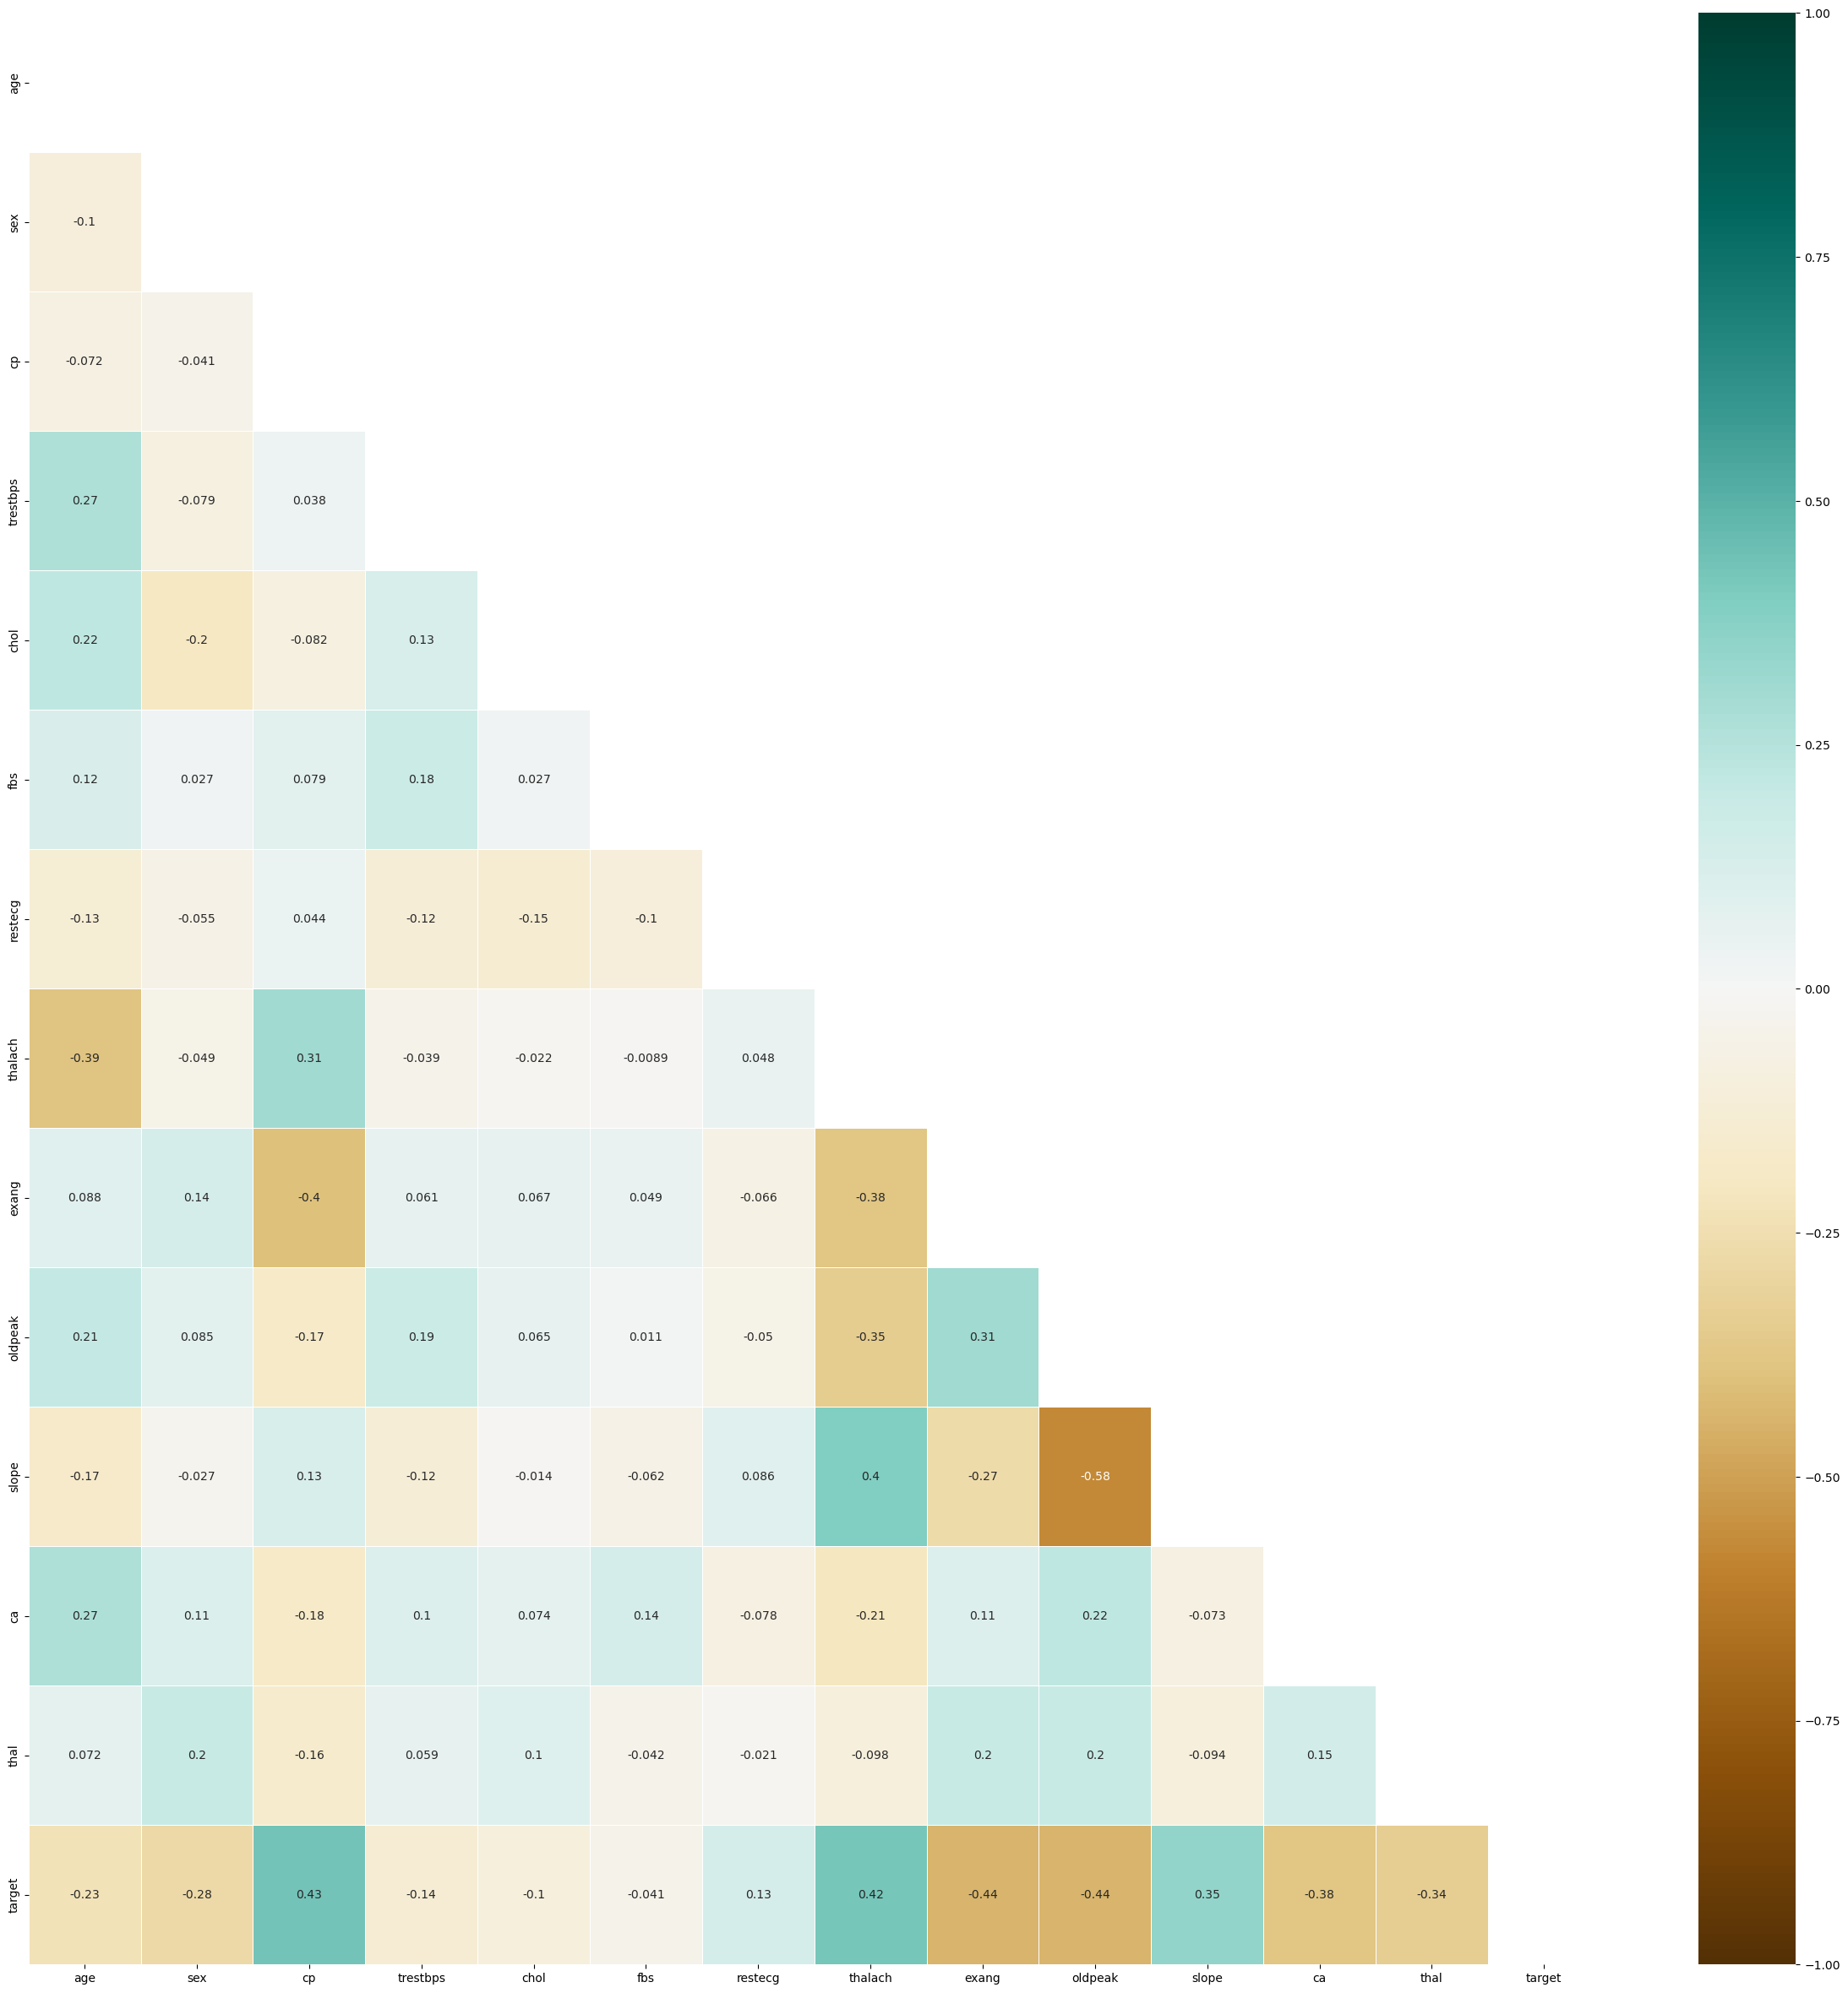

In [9]:
corr = dataset.corr()
plt.figure(figsize=(30,30))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,cmap='BrBG', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=.5,square=False)

In [10]:
dataset['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [11]:
# Percentage of patients have and do not have heart disease
dataset['target'].value_counts()/dataset.shape[0]*100

1    51.317073
0    48.682927
Name: target, dtype: float64

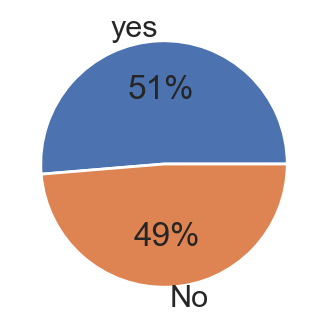

In [12]:
# Create a plot to display the percentage of the positive and negative heart disease
labels = ['yes', 'No']
values = dataset['target'].value_counts().values
sns.set_theme(context='poster')
plt.figure(figsize=(4,4))
#plt.title('Heart Diseases', color="Black",fontsize=18)

plt.pie(values, labels=labels, autopct='%1.0f%%')
#plt.title('People who got Heart Disease')
plt.show()

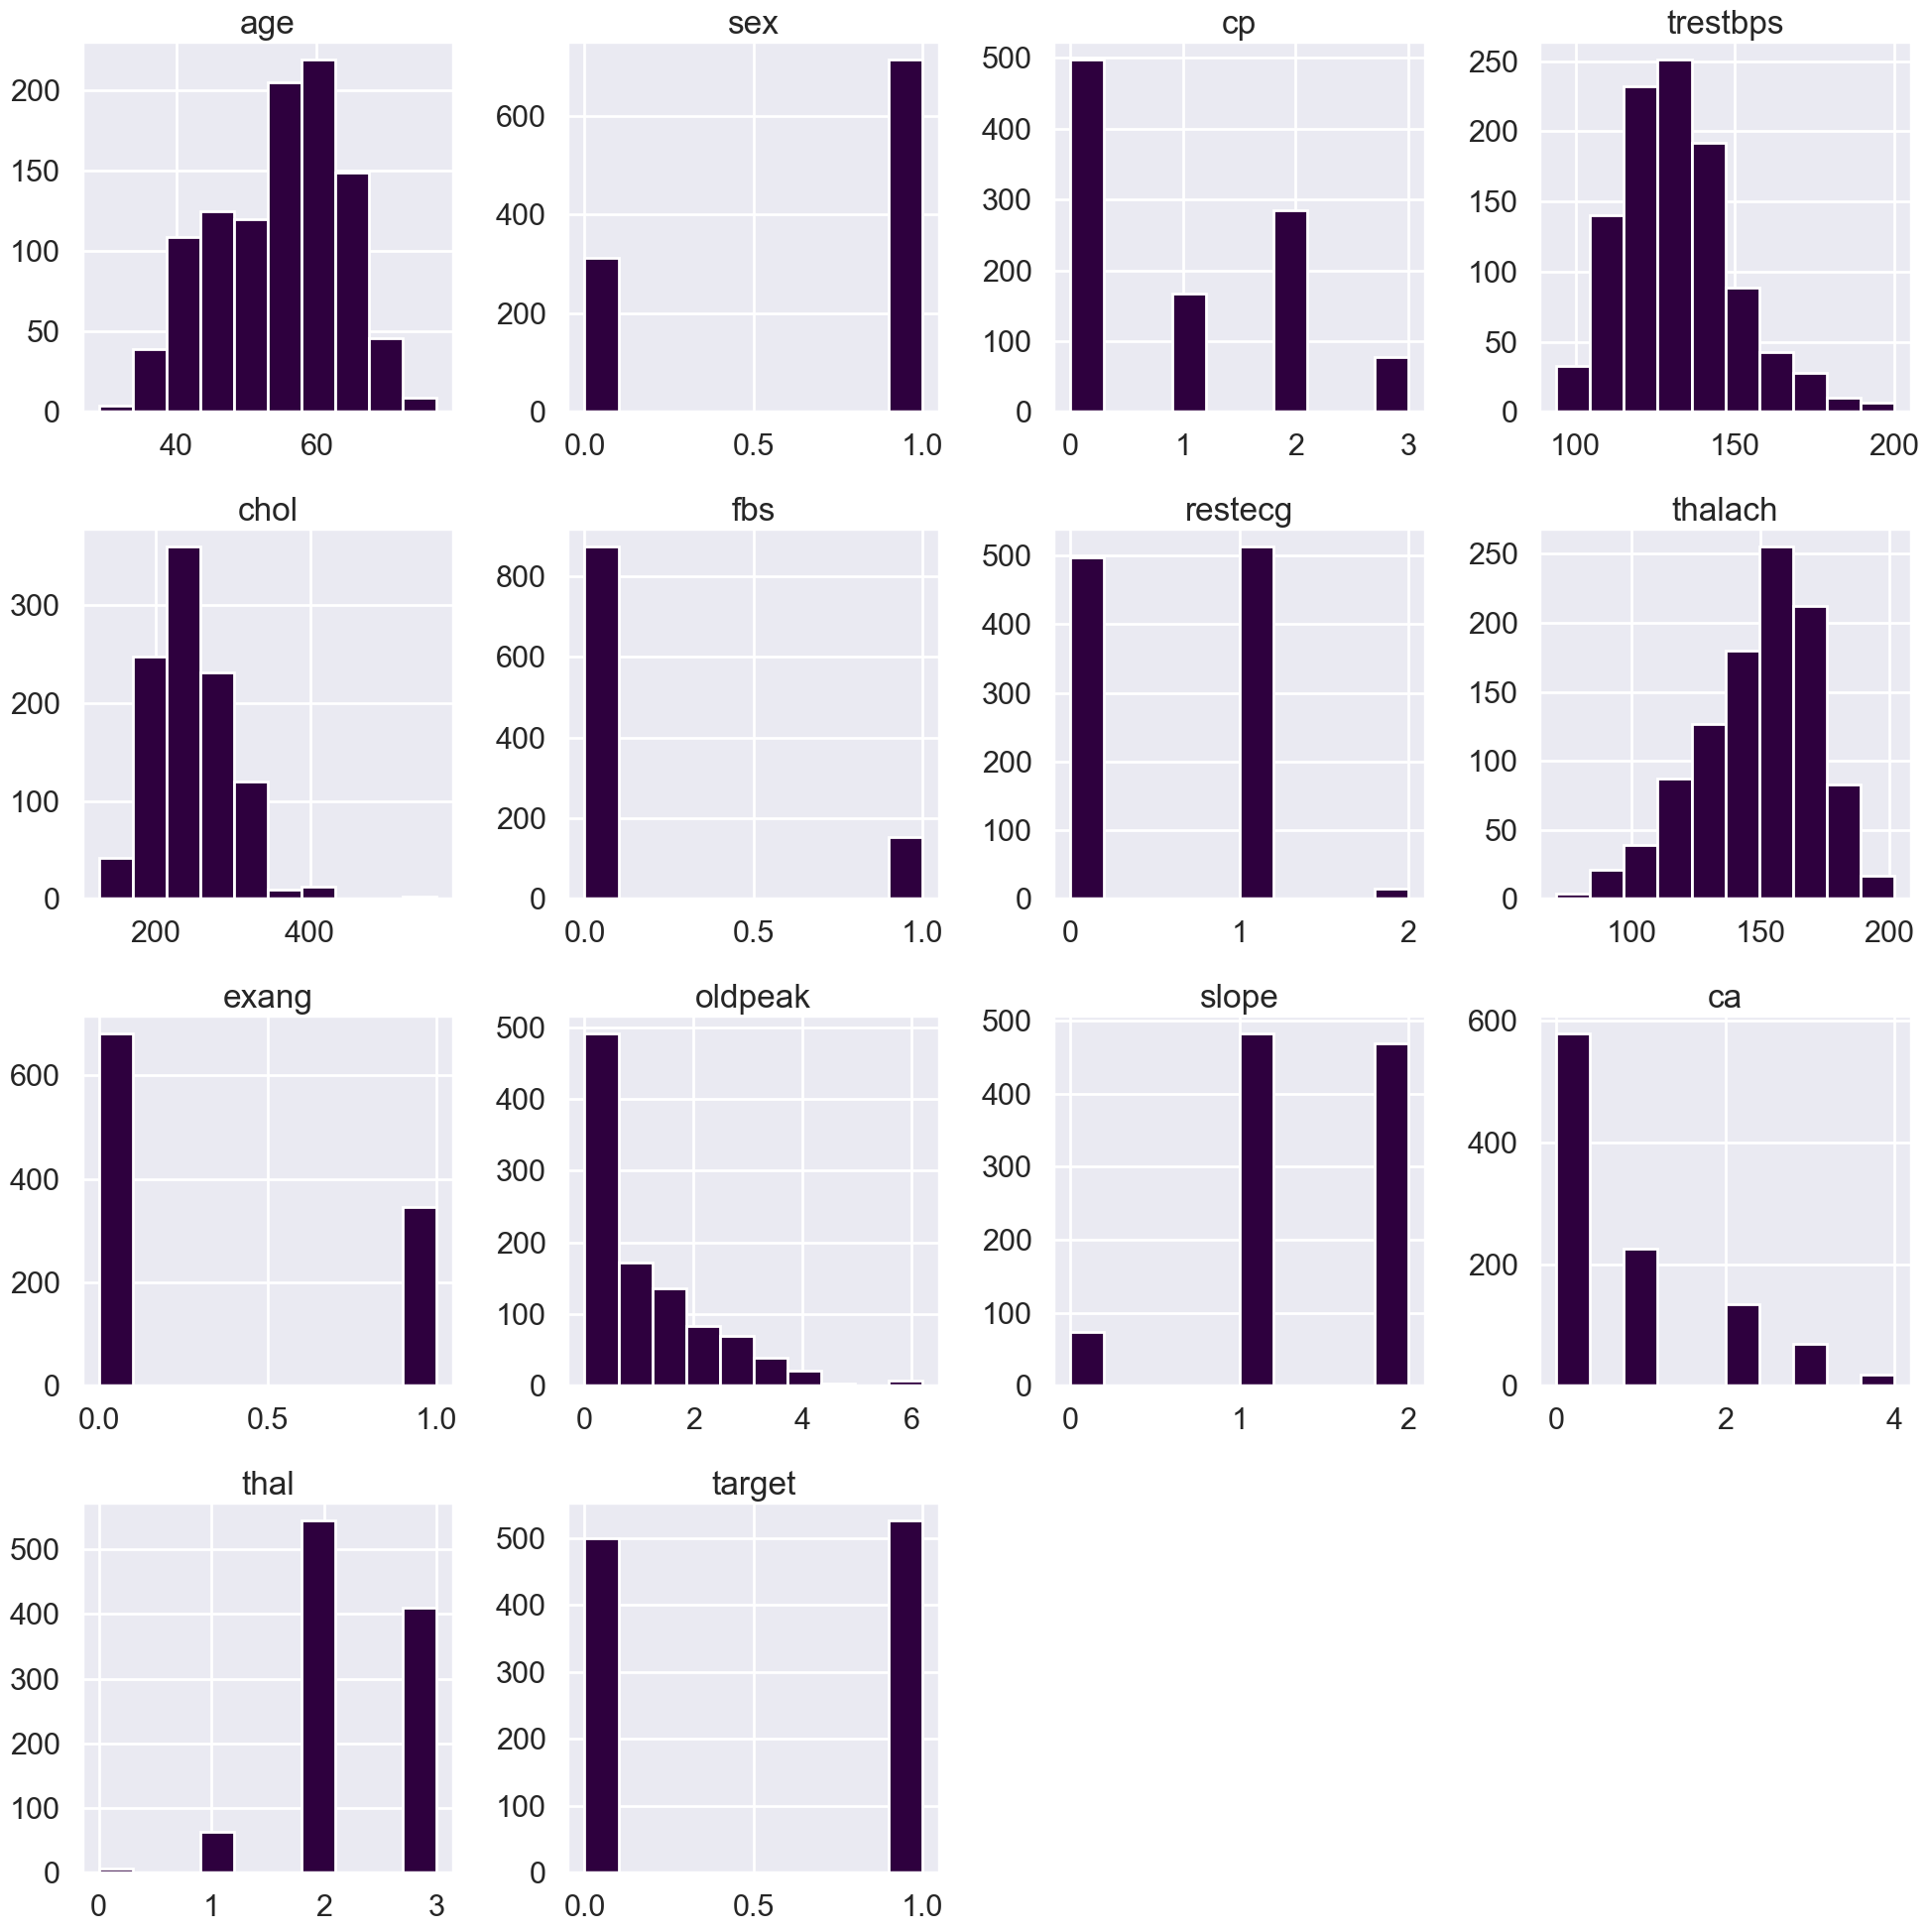

In [13]:
dataset.hist(figsize = (20,20),color='#2e003e')
plt.tight_layout()
plt.show()

In [14]:
#checking the variance
dataset.var()

age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64

There is huge variance that's why we need to normalize this out.

# Normalized

In [15]:
dataset['trestbps']=np.log(dataset['trestbps'])
dataset['chol']=np.log(dataset['chol'])
dataset['thalach']=np.log(dataset['thalach'])

np.var(dataset[["trestbps",'chol','thalach']])

trestbps    0.016843
chol        0.041430
thalach     0.027516
dtype: float64

# Numerical Features

In [16]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,4.828314,5.356586,0,1,5.123964,0,1.0,2,2,3,0
1,53,1,0,4.941642,5.313206,1,0,5.043425,1,3.1,0,0,3,0
2,70,1,0,4.976734,5.159055,0,1,4.828314,1,2.6,0,0,3,0
3,61,1,0,4.997212,5.313206,0,1,5.081404,0,0.0,2,1,3,0
4,62,0,0,4.927254,5.683580,1,1,4.663439,0,1.9,1,3,2,0


# Discrete Features

In [17]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 9


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Continuous Features

In [18]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 5


['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Categorical Features

In [19]:
# Categorical Variables
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

[]

# Outliers

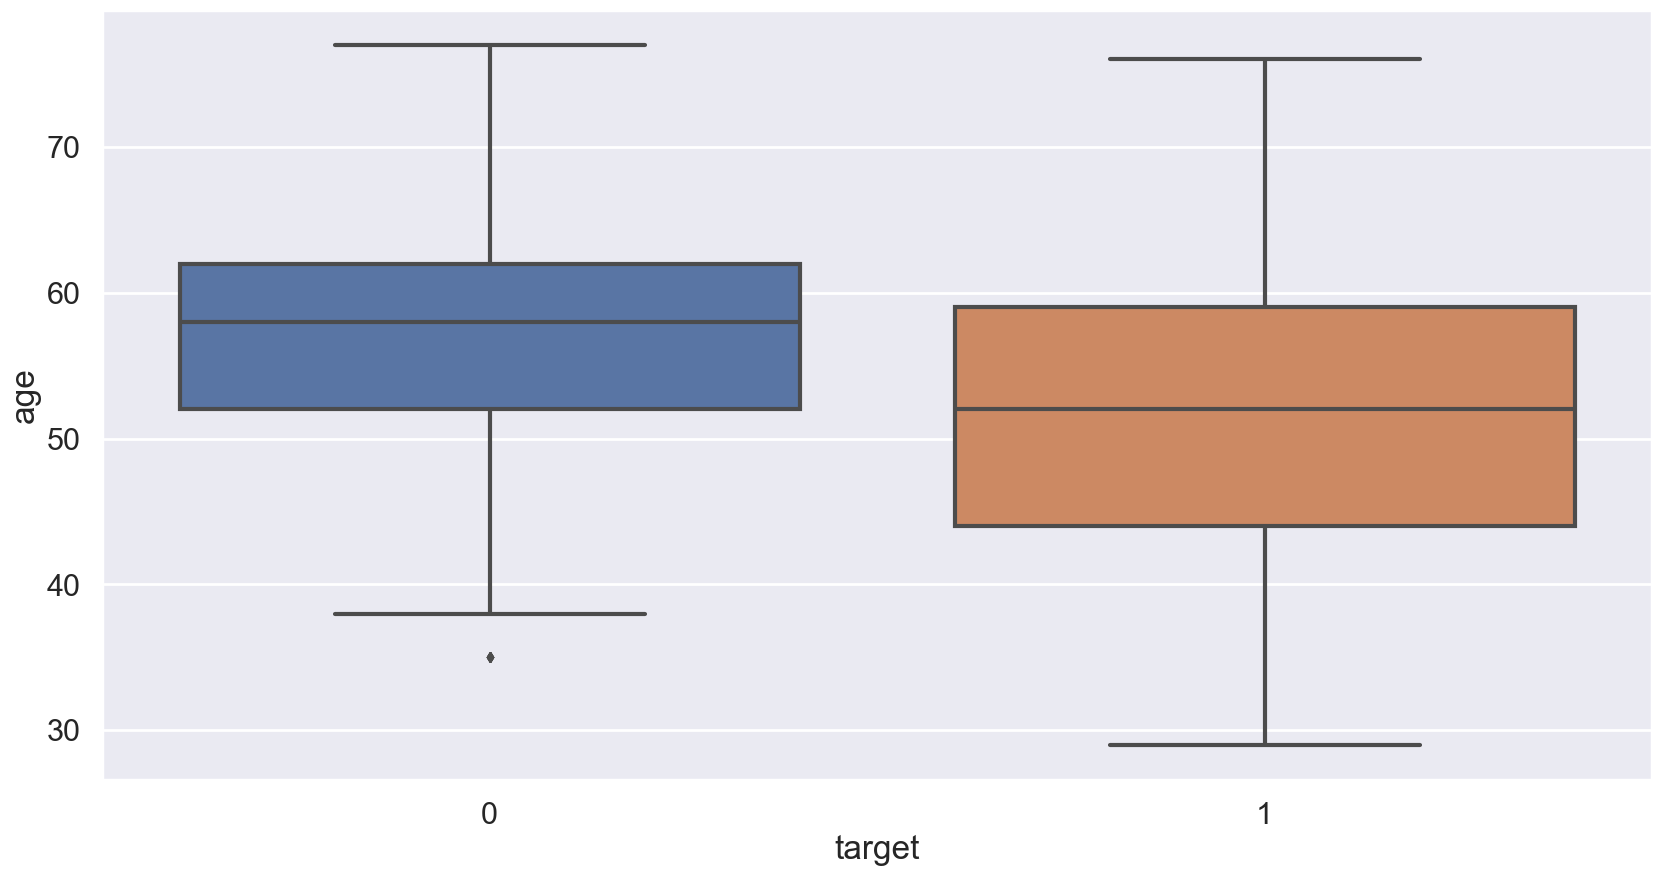

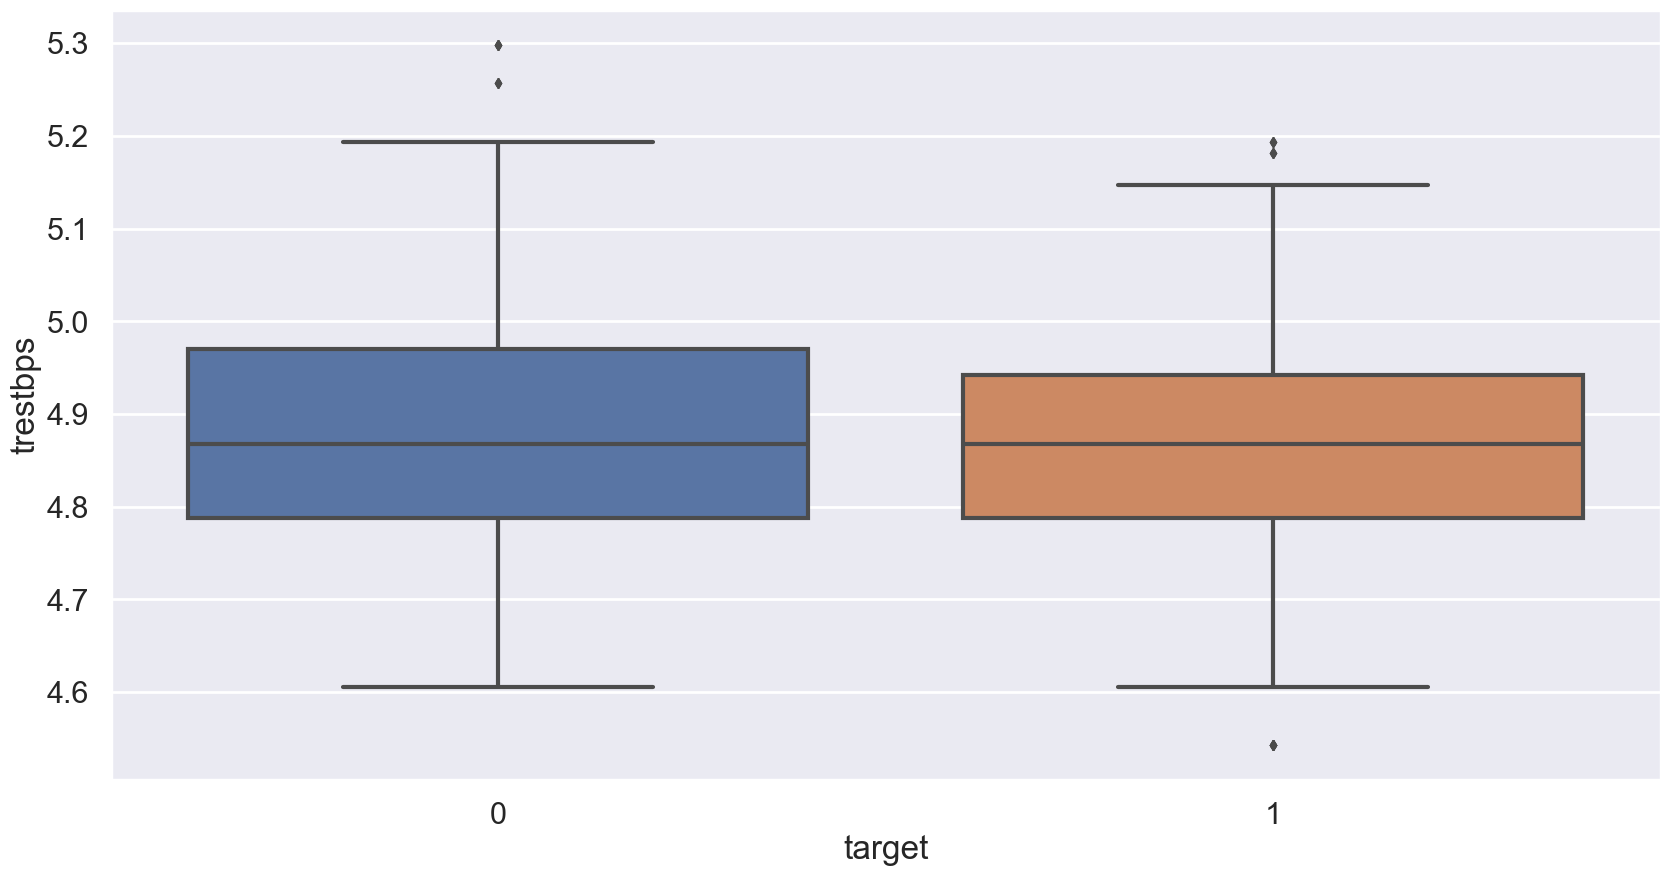

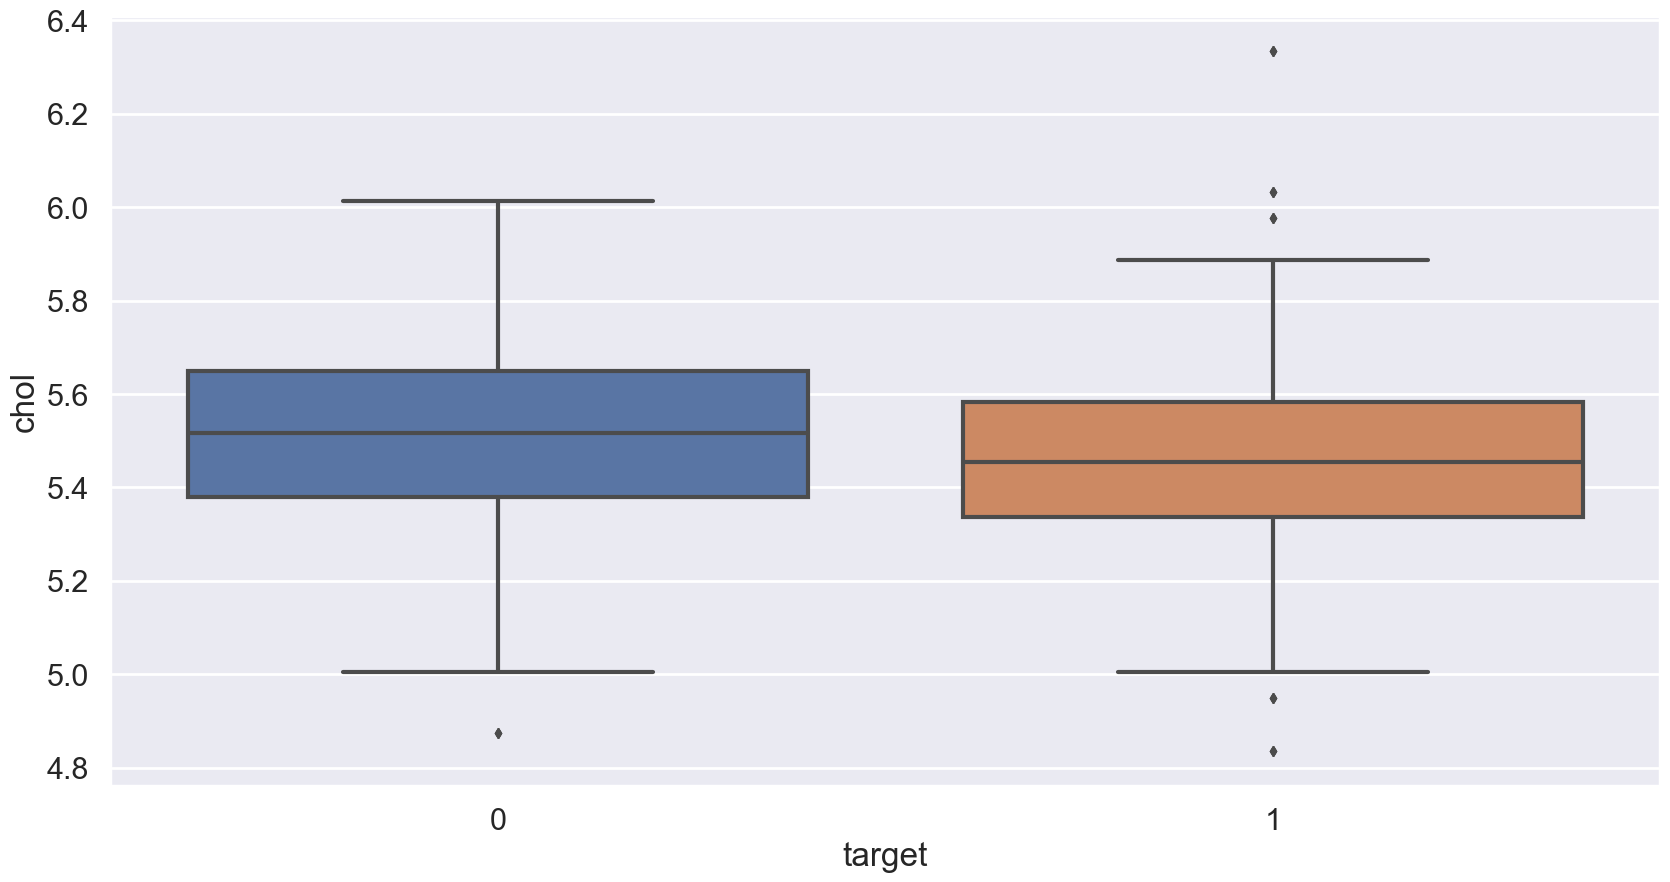

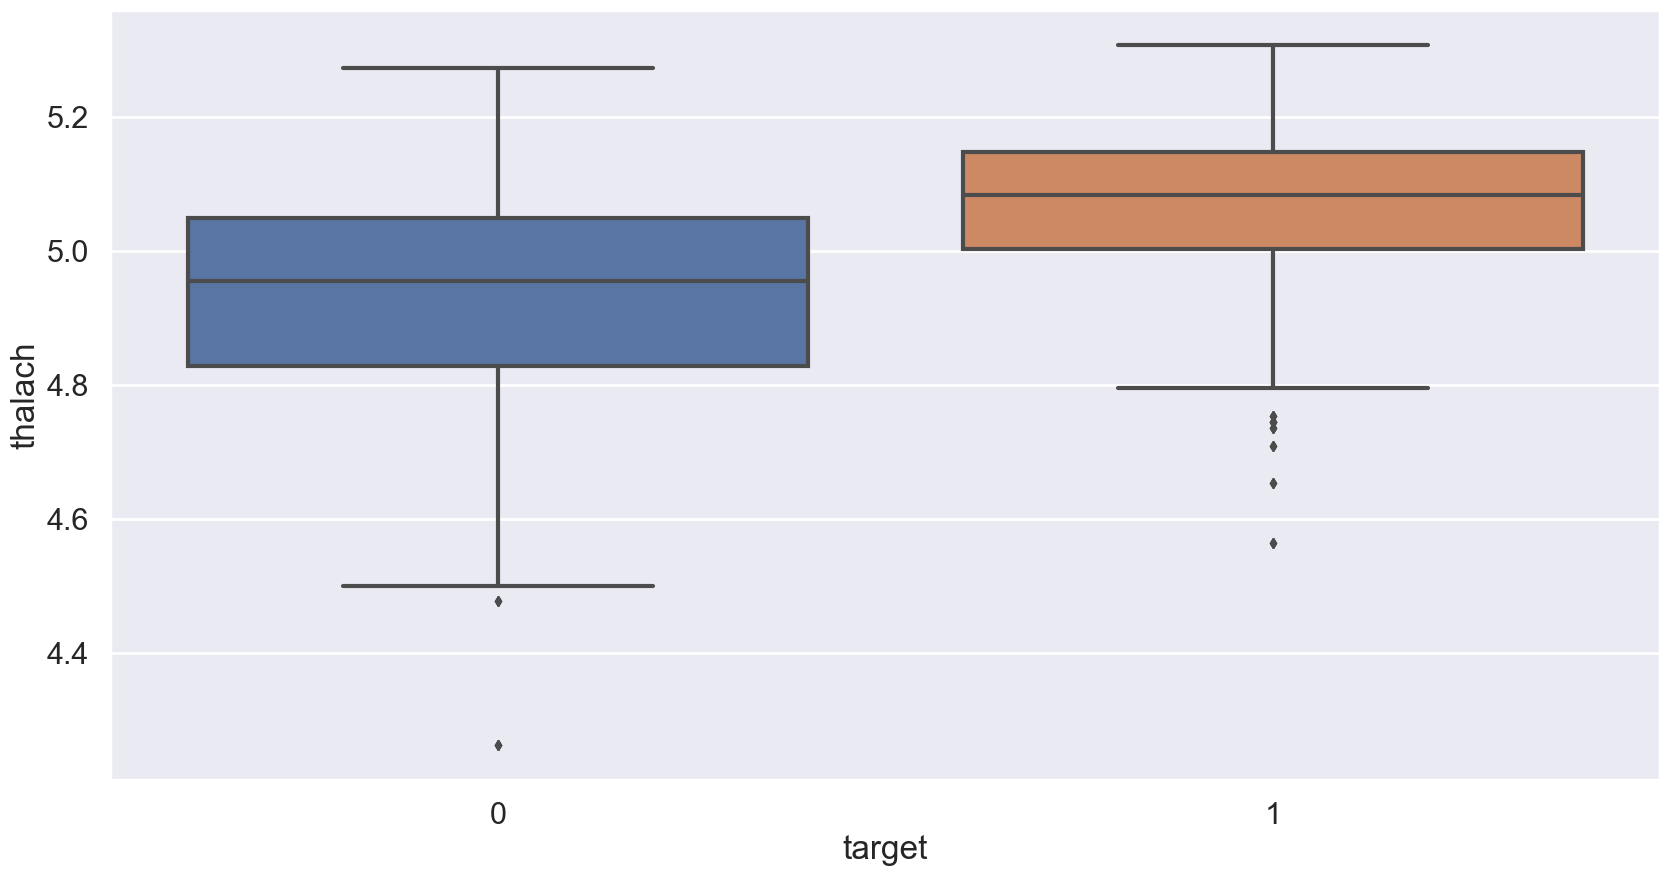

In [20]:
for feature in numerical_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.figure(figsize=(20,10))
        sns.boxplot(data,x='target',y=feature)
        plt.show()

# Data splitting

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
X = dataset.drop('target', axis = 1)
y = dataset['target']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

# Data Balancing

SMOTE Technique

In [22]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state = 0)
xtrain, ytrain = smt.fit_resample(xtrain, ytrain)

print(f'Distribution AFTER balancing:\n{ytrain.value_counts()}')

Distribution AFTER balancing:
1    394
0    394
Name: target, dtype: int64


# FEATURE SCALING

In [23]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

xtrain=ss.fit_transform(xtrain)
xtrain=mms.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)
xtest=mms.fit_transform(xtest)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,4.828314,5.356586,0,1,5.123964,0,1.0,2,2,3,0
1,53,1,0,4.941642,5.313206,1,0,5.043425,1,3.1,0,0,3,0
2,70,1,0,4.976734,5.159055,0,1,4.828314,1,2.6,0,0,3,0
3,61,1,0,4.997212,5.313206,0,1,5.081404,0,0.0,2,1,3,0
4,62,0,0,4.927254,5.683580,1,1,4.663439,0,1.9,1,3,2,0


In [24]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['target']]
len(scaling_feature)

13

In [25]:
mask = ~np.isfinite(dataset)

# count the number of infinite or NaN values in each column
column_sum = mask.sum(axis=0)

# print the column(s) with infinite or NaN values and the number of occurrences
print(column_sum[column_sum > 0])

Series([], dtype: int64)


# FEATURE SELECTION

1. Variane Threshold

In [26]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(xtrain)

VarianceThreshold(threshold=0)

In [27]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [28]:
sum(var_thres.get_support())

13

this has not helped in selecting any feature on the basis of variance

2. MUTUAL INFORMATION FEATURE SELECTION

In [29]:
from sklearn.feature_selection import mutual_info_classif

In [30]:
mutual_info=mutual_info_classif(X,y)

In [31]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

chol        0.259897
thalach     0.151737
thal        0.146156
cp          0.143171
oldpeak     0.130689
ca          0.114747
exang       0.101109
trestbps    0.083857
age         0.067705
slope       0.065650
restecg     0.052005
sex         0.046819
fbs         0.000000
dtype: float64

<Figure size 1000x1000 with 0 Axes>

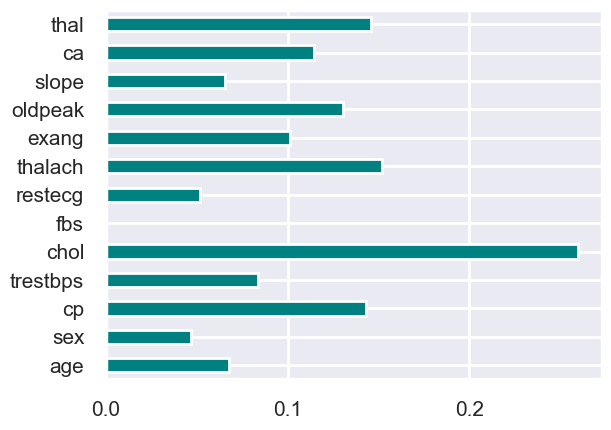

<Figure size 1000x1000 with 0 Axes>

In [32]:
from matplotlib.pyplot import figure
mutual_data.plot(kind='barh',color='teal',fontsize=15)
figure(figsize=(10, 10) )

In [33]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


3. FORWARD FEATURE SELECTION

In [35]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import ExtraTreesClassifier

In [36]:
forward_feature_selection= SequentialFeatureSelector(ExtraTreesClassifier(n_jobs=-1), k_features=(1,7), forward=True,floating=False, verbose=2,scoring='accuracy',cv=5).fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    9.1s finished

[2023-12-29 08:04:34] Features: 1/7 -- score: 0.7690639361444811[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.9s finished

[2023-12-29 08:04:40] Features: 2/7 -- score: 0.8654438442312344[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    5.2s finished

[2023-12-29 08:04:45] Features: 3/7 -- score: 0.9733451584294123[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [37]:
forward_feature_selection.k_feature_names_

('0', '1', '2', '4', '8', '11', '12')

this means :-('age', 'cp', 'chol', 'restecg', 'thalach', 'ca', 'thal')

In [38]:
forward_feature_selection.k_score_

0.9885914698056922

In [39]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.7278481012658228, 0.7721518987341772, 0.784...",0.769064,"(12,)",0.043148,0.03357,0.016785
2,"(4, 12)","[0.8924050632911392, 0.8734177215189873, 0.860...",0.865444,"(4, 12)",0.035079,0.027293,0.013646
3,"(0, 4, 12)","[0.9873417721518988, 0.9683544303797469, 0.968...",0.973345,"(0, 4, 12)",0.012007,0.009342,0.004671
4,"(0, 4, 11, 12)","[0.9873417721518988, 0.9620253164556962, 0.974...",0.977167,"(0, 4, 11, 12)",0.011007,0.008564,0.004282
5,"(0, 2, 4, 11, 12)","[0.9873417721518988, 0.9683544303797469, 0.993...",0.987326,"(0, 2, 4, 11, 12)",0.013612,0.010591,0.005295
6,"(0, 2, 4, 8, 11, 12)","[1.0, 0.9620253164556962, 0.9746835443037974, ...",0.987342,"(0, 2, 4, 8, 11, 12)",0.020579,0.016012,0.008006
7,"(0, 1, 2, 4, 8, 11, 12)","[1.0, 0.9620253164556962, 0.9936708860759493, ...",0.988591,"(0, 1, 2, 4, 8, 11, 12)",0.018119,0.014097,0.007049


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

# Model creation without feature selection

In [35]:
def model(classifier):
    
    classifier.fit(xtrain,ytrain)
    prediction = classifier.predict(xtest)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(ytest,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,xtrain,ytrain,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(ytest,prediction)))
    print("Error Rate: ",'{0:.2%}'.format(1-accuracy_score(ytest,prediction)))
    plot_roc_curve(classifier, xtest,ytest)
    plt.title('ROC_AUC_Plot')
    plt.show()

    
def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(ytest,classifier.predict(xtest))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap ='BrBG' ,fmt ='')
    
    # Classification Report
    print(classification_report(ytest,classifier.predict(xtest)))

# 1. Logistic regression

I.   WITHOUT FEATURE SELECTION
II.  BALANCED
III. WITHOUT HYPERPARAMETER TUNING(GridsearchCV)

In [346]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(xtrain,ytrain)

ypred = lr.predict(xtest)

acc=accuracy_score(ytest,ypred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(ytrain, lr.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred)*100,"%")

Training accuracy score of the model is: 85.91370558375635 %
Testing accuracy score of the model is: 84.8249027237354 %


Accuracy :  84.82%
Cross Validation Score :  91.57%
ROC_AUC Score :  84.76%
Error Rate:  15.18%


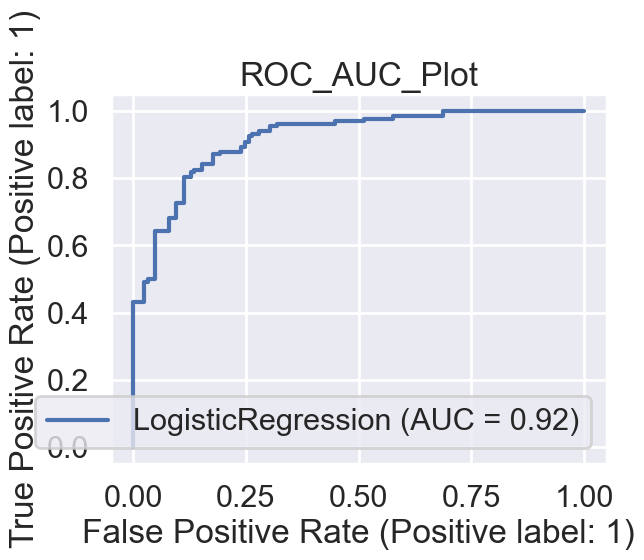

In [347]:
model(lr)

In [42]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred))

print("Classification Report",classification_report(ytest,ypred))

Confusion matrix of the model [[103  22]
 [ 17 115]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.82      0.84       125
           1       0.84      0.87      0.86       132

    accuracy                           0.85       257
   macro avg       0.85      0.85      0.85       257
weighted avg       0.85      0.85      0.85       257



I.   WITHOUT FEATURE SELECTION
II.  BALANCED
III. With HYPERPARAMETER TUNING(GridsearchCV)

In [43]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300],'solver':['newton-cg','lbfgs','liblinear']}

In [44]:
classifier_regressor=GridSearchCV(lr,param_grid=parameter,scoring='accuracy')

In [45]:
classifier_regressor.fit(xtrain,ytrain)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [46]:
print(classifier_regressor.best_params_)

{'C': 2, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [47]:
print(classifier_regressor.best_score_)

0.8490042731597194


In [48]:
ypred = classifier_regressor.predict(xtest)

acc2=accuracy_score(ytest,ypred)
accuracies['LR2']=acc2*100
print("Training accuracy score of the model is:",accuracy_score(ytrain, classifier_regressor.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred)*100,"%")

Training accuracy score of the model is: 85.65989847715736 %
Testing accuracy score of the model is: 82.87937743190662 %


In [ ]:
model(classifier_regressor)

In [49]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred))

print("Classification Report",classification_report(ytest,ypred))

Confusion matrix of the model [[102  23]
 [ 21 111]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.82      0.82       125
           1       0.83      0.84      0.83       132

    accuracy                           0.83       257
   macro avg       0.83      0.83      0.83       257
weighted avg       0.83      0.83      0.83       257



# 2. KNearestNeighbors

I. WITHOUT FEATURE SELECTION II. BALANCED III. WITHOUT HYPERPARAMETER TUNING(GridsearchCV)

In [348]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(xtrain,ytrain)

ypred1 = knn.predict(xtest)

acc3=accuracy_score(ytest,ypred1)
accuracies['KNN']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, knn.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred1)*100,"%")

Training accuracy score of the model is: 89.08629441624365 %
Testing accuracy score of the model is: 85.60311284046692 %


Accuracy :  85.60%
Cross Validation Score :  93.72%
ROC_AUC Score :  85.75%
Error Rate:  14.40%


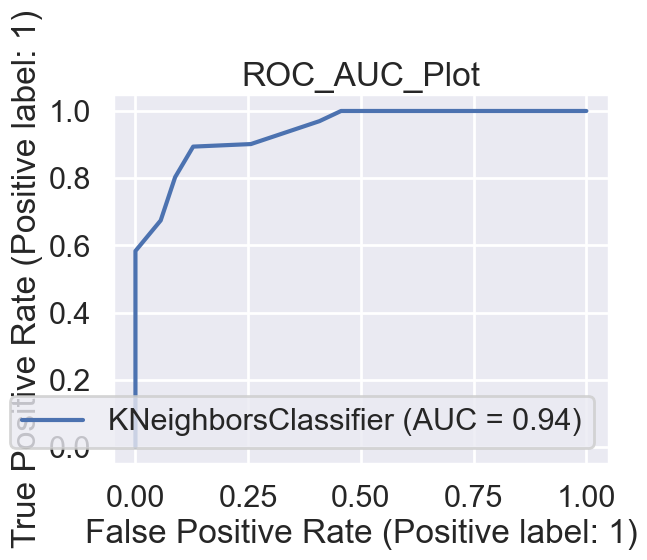

In [349]:
model(knn)

In [51]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred1))

print("Classification Report",classification_report(ytest,ypred1))

Confusion matrix of the model [[114  11]
 [ 26 106]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.91      0.86       125
           1       0.91      0.80      0.85       132

    accuracy                           0.86       257
   macro avg       0.86      0.86      0.86       257
weighted avg       0.86      0.86      0.86       257



I. WITHOUT FEATURE SELECTION II. BALANCED III. With HYPERPARAMETER TUNING(GridsearchCV)

In [52]:
k_range = list(range(1, 31))
parameter = dict(n_neighbors=k_range)

In [53]:
classifier_knn=GridSearchCV(knn,param_grid=parameter, scoring='accuracy', return_train_score=False, verbose=1)

In [54]:
classifier_knn.fit(xtrain,ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=8),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [55]:
print(classifier_knn.best_params_)

{'n_neighbors': 1}


In [56]:
print(classifier_knn.best_score_)

0.9847617511892283


In [57]:
ypred = classifier_knn.predict(xtest)

acc4=accuracy_score(ytest,ypred)
accuracies['KNN2']=acc4*100
print("Training accuracy score of the model is:",accuracy_score(ytrain, classifier_knn.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 98.83268482490273 %


In [ ]:
model(classifier_knn)

In [58]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred))

print("Classification Report",classification_report(ytest,ypred))

Confusion matrix of the model [[125   0]
 [  3 129]]
Classification Report               precision    recall  f1-score   support

           0       0.98      1.00      0.99       125
           1       1.00      0.98      0.99       132

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



# SVM Classifier

I. WITHOUT FEATURE SELECTION II. BALANCED III. WITHOUT HYPERPARAMETER TUNING(GridsearchCV)

In [350]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(xtrain, ytrain)

ypred2 = svc.predict(xtest)

acc5=accuracy_score(ytest,ypred2)
accuracies['SVM']=acc5*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, svc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred2)*100,"%")

Training accuracy score of the model is: 90.86294416243655 %
Testing accuracy score of the model is: 89.88326848249028 %


Accuracy :  89.88%
Cross Validation Score :  94.76%
ROC_AUC Score :  89.96%
Error Rate:  10.12%


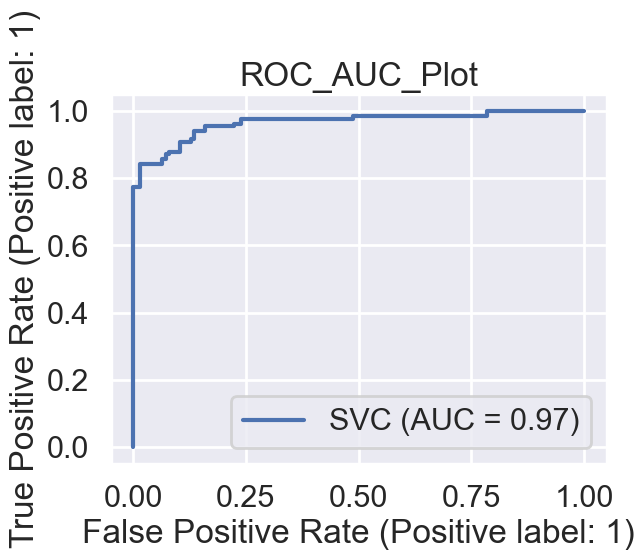

In [351]:
model(svc)

In [339]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred2))

print("Classification Report",classification_report(ytest,ypred2))

Confusion matrix of the model [[116   9]
 [ 17 115]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.93      0.90       125
           1       0.93      0.87      0.90       132

    accuracy                           0.90       257
   macro avg       0.90      0.90      0.90       257
weighted avg       0.90      0.90      0.90       257



I. WITHOUT FEATURE SELECTION II. BALANCED III. WITH HYPERPARAMETER TUNING(GridsearchCV)

In [340]:
parameter2 ={'C':[1, 10, 100],'gamma':[0.001, 0.0001],'kernel': ['linear','rbf']}

In [62]:
classifier_svc=GridSearchCV(svc,param_grid=parameter2,scoring='accuracy',cv=10)

In [63]:
classifier_svc.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [64]:
print(classifier_svc.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


In [65]:
print(classifier_svc.best_score_)

0.8439143135345668


In [66]:
ypred = classifier_svc.predict(xtest)

acc6=accuracy_score(ytest,ypred)
accuracies['SVM2']=acc6*100
print("Training accuracy score of the model is:",accuracy_score(ytrain, classifier_svc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred)*100,"%")

Training accuracy score of the model is: 84.8984771573604 %
Testing accuracy score of the model is: 86.38132295719845 %


In [67]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred1))
print("Classification Report",classification_report(ytest,ypred1))

Confusion matrix of the model [[114  11]
 [ 26 106]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.91      0.86       125
           1       0.91      0.80      0.85       132

    accuracy                           0.86       257
   macro avg       0.86      0.86      0.86       257
weighted avg       0.86      0.86      0.86       257



# 4.Decision Tree Classifier

I. WITHOUT FEATURE SELECTION II. BALANCED III. WITHOUT HYPERPARAMETER TUNING(GridsearchCV)

In [352]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 1000,max_depth = 10,min_samples_leaf = 10 )
dtc.fit(xtrain, ytrain)

ypred3 = dtc.predict(xtest)

acc7=accuracy_score(ytest,ypred3)
accuracies['DT']=acc7*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, dtc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred3)*100,"%")

Training accuracy score of the model is: 92.25888324873097 %
Testing accuracy score of the model is: 86.7704280155642 %


Accuracy :  86.77%
Cross Validation Score :  95.51%
ROC_AUC Score :  86.65%
Error Rate:  13.23%


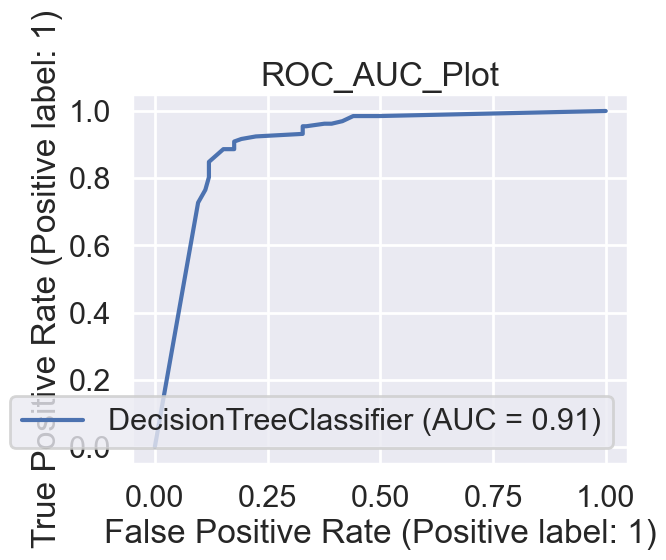

In [353]:
model(dtc)

In [343]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred3))
print("Classification Report",classification_report(ytest,ypred3))

Confusion matrix of the model [[103  22]
 [ 12 120]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.82      0.86       125
           1       0.85      0.91      0.88       132

    accuracy                           0.87       257
   macro avg       0.87      0.87      0.87       257
weighted avg       0.87      0.87      0.87       257



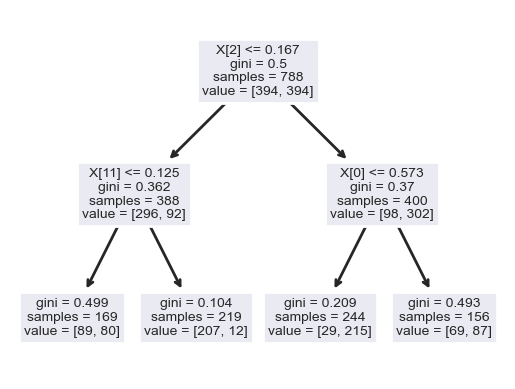

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

In [70]:
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(xtrain,ytrain)
from sklearn.tree import plot_tree
plot_tree(tree,fontsize=10)
plt.show()
plt.figure(figsize=(100,100))

I. WITHOUT FEATURE SELECTION II. BALANCED III. WITH HYPERPARAMETER TUNING(GridsearchCV)

In [71]:
parameter1 ={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[1,2,3,4,5],'max_features':['auto', 'sqrt', 'log2']}

In [72]:
classifier_decisiontree=GridSearchCV(dtc,param_grid=parameter1,scoring='accuracy',cv=10)

In [73]:
classifier_decisiontree.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=10,
                                              random_state=1000),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [74]:
print(classifier_decisiontree.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'random'}


In [75]:
print(classifier_decisiontree.best_score_)

0.8007627393703343


In [76]:
ypred = classifier_decisiontree.predict(xtest)

acc8=accuracy_score(ytest,ypred)
accuracies['DT2']=acc8*100
print("Training accuracy score of the model is:",accuracy_score(ytrain, classifier_decisiontree.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred)*100,"%")

Training accuracy score of the model is: 82.10659898477158 %
Testing accuracy score of the model is: 80.1556420233463 %


# 5.Random Forest

In [354]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(xtrain, ytrain)

ypred5 = rfc.predict(xtest)

acc9=accuracy_score(ytest,ypred5)
accuracies['RF']=acc9*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, rfc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred5)*100,"%")

Training accuracy score of the model is: 99.11167512690355 %
Testing accuracy score of the model is: 95.3307392996109 %


Accuracy :  94.55%
Cross Validation Score :  99.34%
ROC_AUC Score :  94.46%
Error Rate:  5.45%


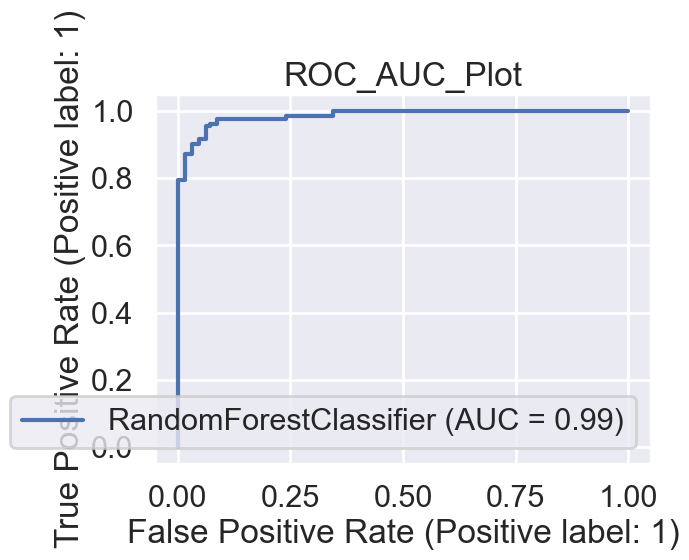

In [355]:
model(rfc)

In [78]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred5))

print("Classification Report",classification_report(ytest,ypred5))

Confusion matrix of the model [[116   9]
 [  4 128]]
Classification Report               precision    recall  f1-score   support

           0       0.97      0.93      0.95       125
           1       0.93      0.97      0.95       132

    accuracy                           0.95       257
   macro avg       0.95      0.95      0.95       257
weighted avg       0.95      0.95      0.95       257



In [79]:
n_estimators=[100]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_leaf=[1,2]
bootstrap=[True,False]
min_samples_split=[2,5]

In [80]:
param_grid={'max_features':max_features,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap,'min_samples_split':min_samples_split}

In [81]:
classifier_randomsearch=GridSearchCV(rfc,param_grid,scoring='accuracy',cv=10)

In [82]:
classifier_randomsearch.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=7, max_features='sqrt',
                                              min_samples_leaf=2,
                                              min_samples_split=4,
                                              n_estimators=180),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='accuracy')

In [83]:
print(classifier_randomsearch.best_params_)

{'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [84]:
print(classifier_randomsearch.best_score_)

0.892177864329763


In [85]:
ypred5 =classifier_randomsearch.predict(xtest)

acc10=accuracy_score(ytest,ypred5)
accuracies['RF2']=acc10*100

print("Training accuracy score of the model is:",accuracy_score(ytrain,classifier_randomsearch.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred5)*100,"%")

Training accuracy score of the model is: 91.75126903553299 %
Testing accuracy score of the model is: 90.27237354085604 %


In [86]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred5))

print("Classification Report",classification_report(ytest,ypred5))

Confusion matrix of the model [[106  19]
 [  6 126]]
Classification Report               precision    recall  f1-score   support

           0       0.95      0.85      0.89       125
           1       0.87      0.95      0.91       132

    accuracy                           0.90       257
   macro avg       0.91      0.90      0.90       257
weighted avg       0.91      0.90      0.90       257



# 6. Gradient Boosting

In [356]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)
gbc.fit(xtrain, ytrain)

ypred6 = gbc.predict(xtest)

acc11 = accuracy_score(ytest,ypred6)
accuracies['GB1']=acc11*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, gbc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred6)*100,"%")

Training accuracy score of the model is: 98.3502538071066 %
Testing accuracy score of the model is: 92.21789883268482 %


Accuracy :  92.22%
Cross Validation Score :  98.90%
ROC_AUC Score :  92.13%
Error Rate:  7.78%


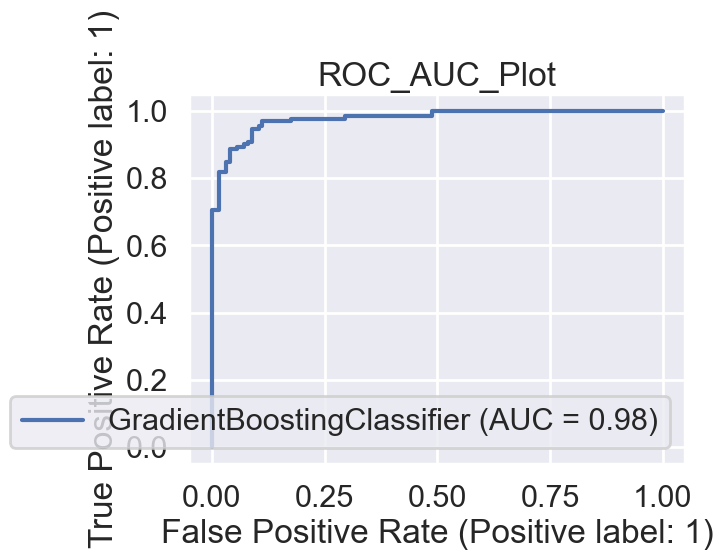

In [357]:
model(gbc)

In [88]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

parameters={'learning_rate': [0.1,0.7],
            'subsample':[0.1,0.9],
            'n_estimators':[100,1000],
            'max_depth':[4,10]
           }

In [89]:
classifier_Gb=GridSearchCV(gbc,param_grid=parameters,scoring='accuracy',cv=10)

In [90]:
classifier_Gb.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  n_estimators=180),
             param_grid={'learning_rate': [0.1, 0.7], 'max_depth': [4, 10],
                         'n_estimators': [100, 1000], 'subsample': [0.1, 0.9]},
             scoring='accuracy')

In [91]:
print(classifier_Gb.best_score_)

0.9961863031483285


In [92]:
print(classifier_Gb.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.1}


In [93]:
ypred6 = classifier_Gb.predict(xtest)

acc12 = accuracy_score(ytest,ypred6)
accuracies['GB2']=acc12*100

print("Training accuracy score of the model is:",accuracy_score(ytrain,classifier_Gb.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred6)*100,"%")

Training accuracy score of the model is: 97.58883248730965 %
Testing accuracy score of the model is: 90.6614785992218 %


In [ ]:
model(classifier_Gb)

In [94]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred6))
print("Classification Report",classification_report(ytest,ypred6))

Confusion matrix of the model [[107  18]
 [  6 126]]
Classification Report               precision    recall  f1-score   support

           0       0.95      0.86      0.90       125
           1       0.88      0.95      0.91       132

    accuracy                           0.91       257
   macro avg       0.91      0.91      0.91       257
weighted avg       0.91      0.91      0.91       257



# Naive Bayes

In [358]:
from sklearn.naive_bayes import GaussianNB

classifier_NB = GaussianNB()
classifier_NB.fit(xtrain, ytrain)

ypred7 = classifier_NB.predict(xtest)

acc11 = accuracy_score(ytest,ypred7)
accuracies['NB']=acc11*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, gbc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred7)*100,"%")

Training accuracy score of the model is: 98.3502538071066 %
Testing accuracy score of the model is: 81.71206225680933 %


Accuracy :  81.71%
Cross Validation Score :  90.14%
ROC_AUC Score :  81.65%
Error Rate:  18.29%


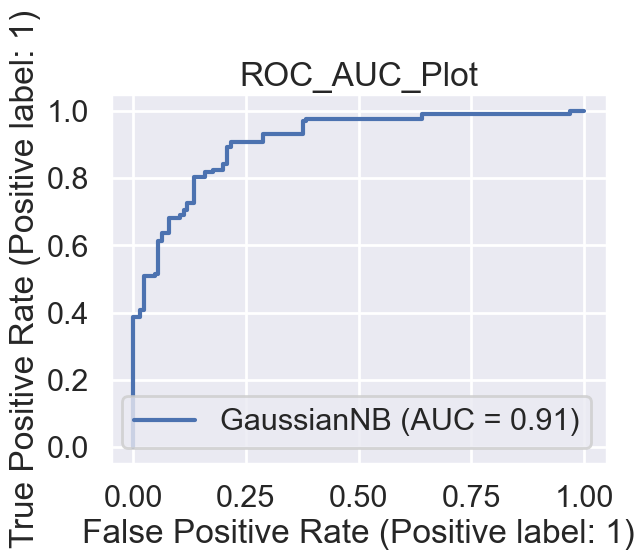

In [359]:
model(classifier_NB)

In [96]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred7))
print("Classification Report",classification_report(ytest,ypred7))

Confusion matrix of the model [[ 99  26]
 [ 21 111]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.79      0.81       125
           1       0.81      0.84      0.83       132

    accuracy                           0.82       257
   macro avg       0.82      0.82      0.82       257
weighted avg       0.82      0.82      0.82       257



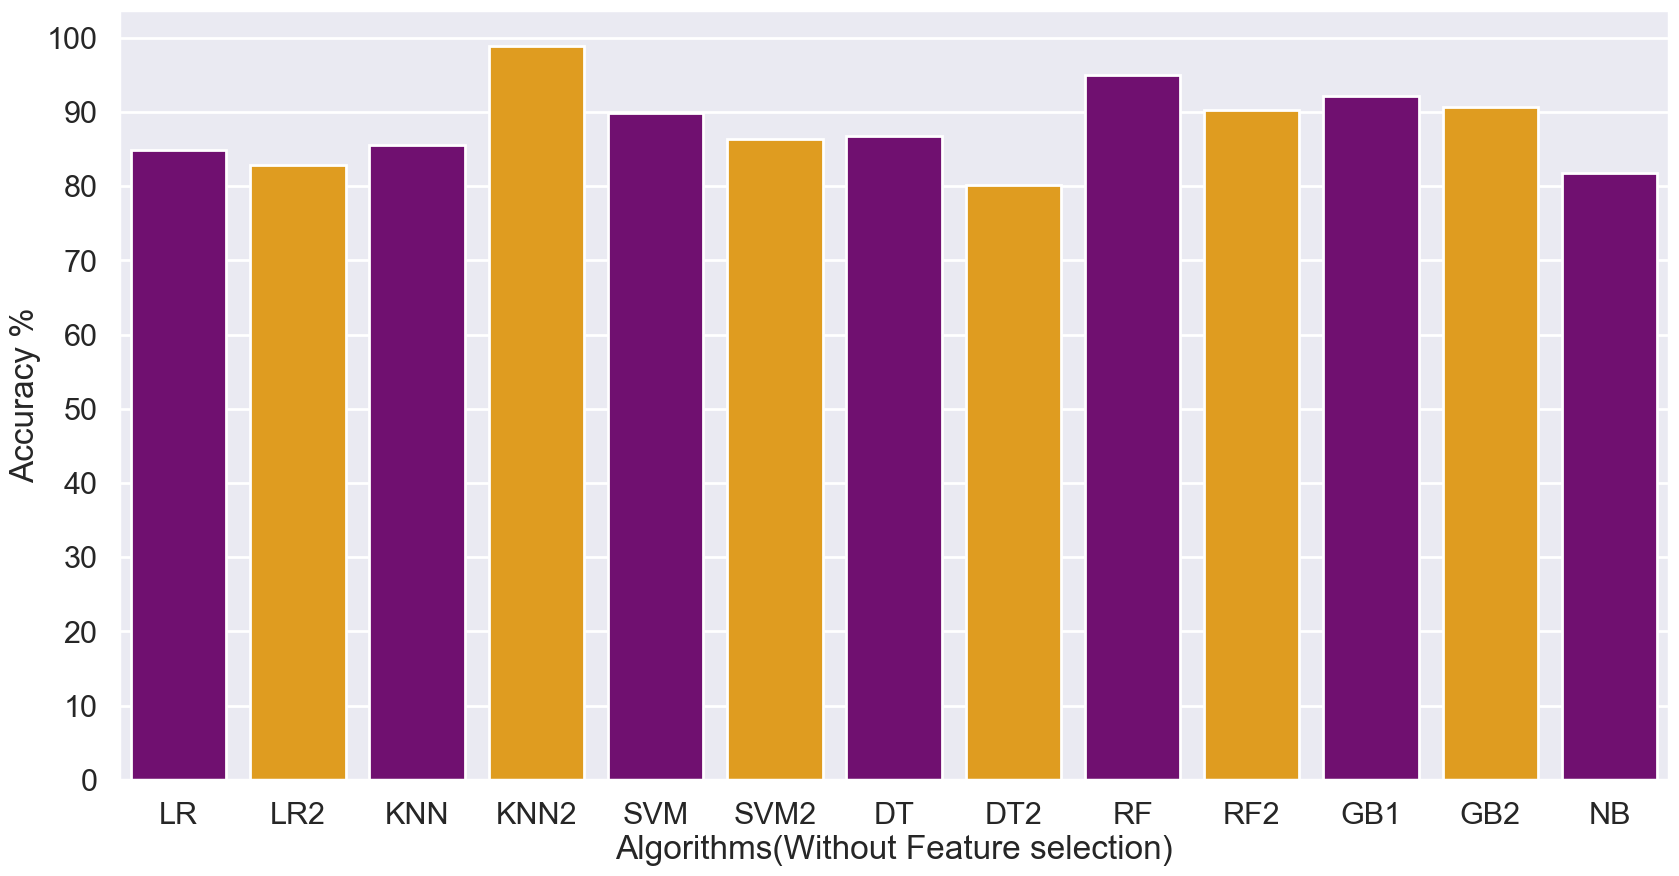

In [97]:
colors = ["purple", "orange"]

# sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms(Without Feature selection)")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

# ROC Curve accuracy plotting

Fitting 5 folds for each of 30 candidates, totalling 150 fits


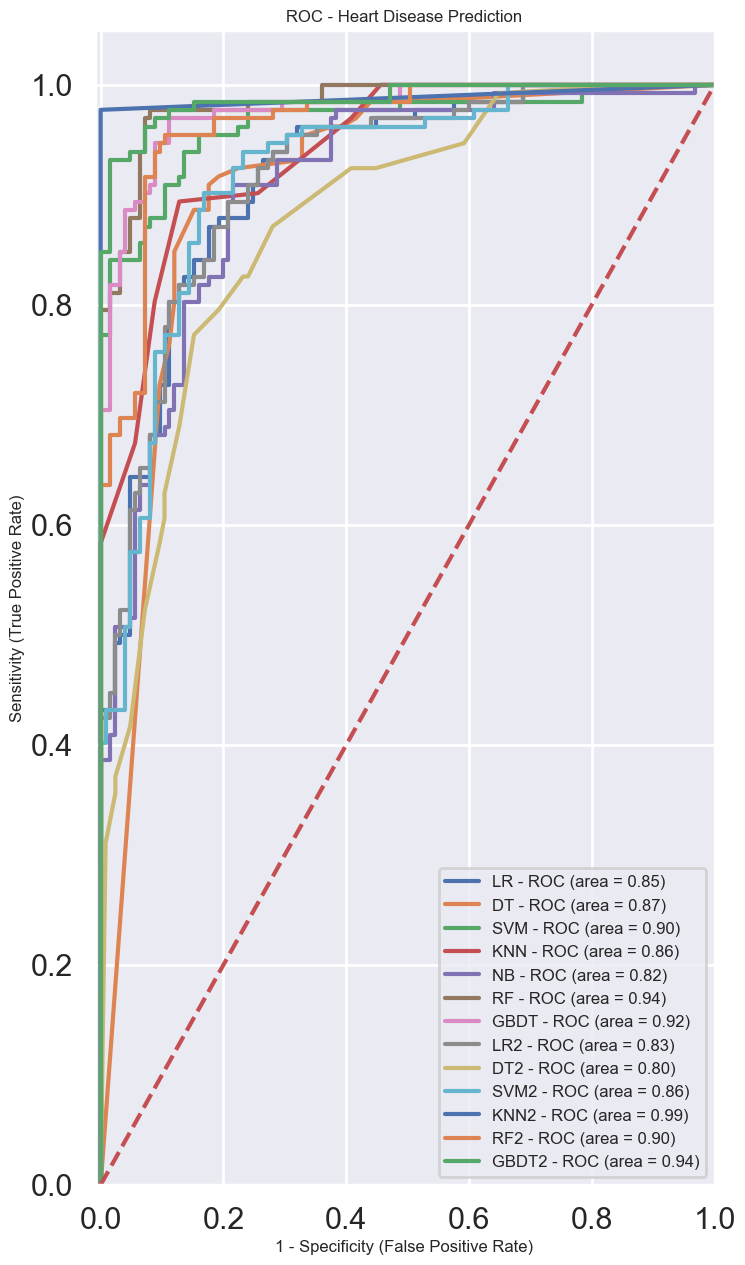

In [103]:
from sklearn import metrics
plt.figure(figsize=(8,15))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'NB',
    'model': classifier_NB,
},
{
    'label': 'RF',
    'model': rfc,
},
{
    'label': 'GBDT',
    'model': gbc,
},
    {
    'label': 'LR2',
    'model': classifier_regressor,
},
{
    'label': 'DT2',
    'model': classifier_decisiontree,
},
{
    'label': 'SVM2',
    'model': classifier_svc,
},
{
    'label': 'KNN2',
    'model': classifier_knn,
},

{
    'label': 'RF2',
    'model': classifier_randomsearch,
},
{
    'label': 'GBDT2',
    'model': classifier_Gb,
}
]
for m in models:
    model = m['model'] 
    model.fit(xtrain, ytrain) 
    y_pred=model.predict(xtest) 
    fpr1, tpr1, thresholds = metrics.roc_curve(ytest, model.predict_proba(xtest)[:,1])
    auc = metrics.roc_auc_score(ytest,model.predict(xtest))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Heart Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

# Particle Swarm Optimization

In [36]:
from sklearn.svm import SVC
from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import ParticleSwarmOptimization

In [37]:
X_new=dataset.drop(columns=['target'])
y_new=dataset['target']

In [38]:
X=X_new.to_numpy()
y=y_new.to_numpy()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

In [40]:
class FeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.99):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
       # self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
       # accuracy = cross_val_score(SVC(), self.X_train[:, selected], self.y_train, cv=2, n_jobs=-1).mean()
        #score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return num_features
       # return self.alpha * score + (1 - self.alpha) * (num_selected / num_features)

In [41]:
problem = FeatureSelection(X_train, y_train)
task = Task(problem, max_iters=100)
algorithm = ParticleSwarmOptimization( population_size=10, limit=100,seed=1234)
best_features, best_fitness = algorithm.run(task)

In [42]:
dataset_features=dataset.drop(columns=['target'])
best_features

array([0.97669977, 0.38019574, 0.92324623, 0.26169242, 0.31909706,
       0.11809123, 0.24176629, 0.31853393, 0.96407925, 0.2636498 ,
       0.44100612, 0.60987081, 0.8636213 ])

In [43]:
feature_names=dataset_features.columns.to_numpy()

In [44]:
selected_features = best_features > 0.5
print('Number of selected features:', selected_features.sum())

print('Selected features:', ', '.join(feature_names[selected_features].tolist()))

print(selected_features)

Number of selected features: 5
Selected features: age, cp, exang, ca, thal
[ True False  True False False False False False  True False False  True
  True]


In [45]:
df=dataset[['age','cp','exang','ca','thal','target']].copy()

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
x = df.drop('target', axis = 1)
Y = df['target']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, Y, test_size = 0.25, stratify = Y, random_state = 0)

# Model creation after PSO Algorithm

In [47]:
def model(classifier):
    
    classifier.fit(Xtrain,Ytrain)
    prediction = classifier.predict(Xtest)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,Xtrain,Ytrain,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(Ytest,prediction)))
    plot_roc_curve(classifier, Xtest,Ytest)
    plt.title('ROC_AUC_Plot')
    plt.show()

    
def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(Ytest,classifier.predict(Xtest))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap ='BrBG' ,fmt ='')
    
    # Classification Report
    print(classification_report(Ytest,classifier.predict(Xtest)))



# 1. Logistic Regression

In [51]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(X_train,y_train)

ypred = lr.predict(X_test)

acc=accuracy_score(y_test,ypred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred)*100,"%")

Training accuracy score of the model is: 85.24390243902438 %
Testing accuracy score of the model is: 84.8780487804878 %


Cross Validation Score :  85.93%
ROC_AUC Score :  81.18%


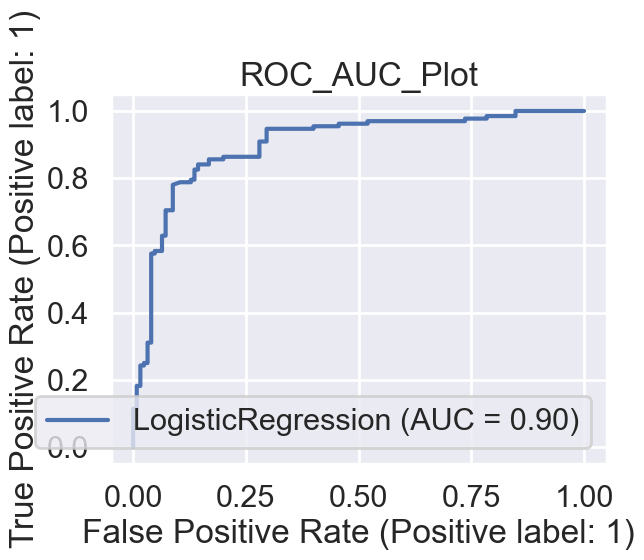

In [211]:
model(lr)

In [212]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred))

print("Classification Report",classification_report(y_test,ypred))

Confusion matrix of the model [[78 22]
 [ 9 96]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.78      0.83       100
           1       0.81      0.91      0.86       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



In [213]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300],'solver':['newton-cg','lbfgs','liblinear']}

In [214]:
classifier_regressor=GridSearchCV(lr,param_grid=parameter,scoring='accuracy')

In [215]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [216]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


In [217]:
print(classifier_regressor.best_score_)

0.8426829268292682


In [218]:
ypred = classifier_regressor.predict(X_test)
acc2=accuracy_score(y_test,ypred)
accuracies['LR2']=acc2*100
print("Training accuracy score of the model is:",accuracy_score(y_train, classifier_regressor.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred)*100,"%")

Training accuracy score of the model is: 85.60975609756098 %
Testing accuracy score of the model is: 84.39024390243902 %


Cross Validation Score :  85.72%
ROC_AUC Score :  82.40%


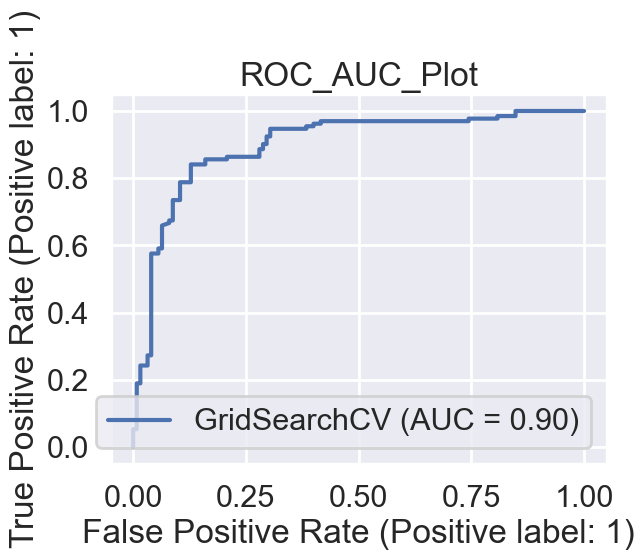

In [219]:
model(classifier_regressor)

In [61]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred))
print("Classification Report",classification_report(y_test,ypred))

Confusion matrix of the model [[77 23]
 [ 9 96]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.77      0.83       100
           1       0.81      0.91      0.86       105

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



# 2. KNearestNeighbors

In [220]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)

ypred1 = knn.predict(X_test)

acc3=accuracy_score(y_test,ypred1)
accuracies['KNN']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred1)*100,"%")

Training accuracy score of the model is: 82.5609756097561 %
Testing accuracy score of the model is: 82.4390243902439 %


Cross Validation Score :  83.22%
ROC_AUC Score :  81.48%


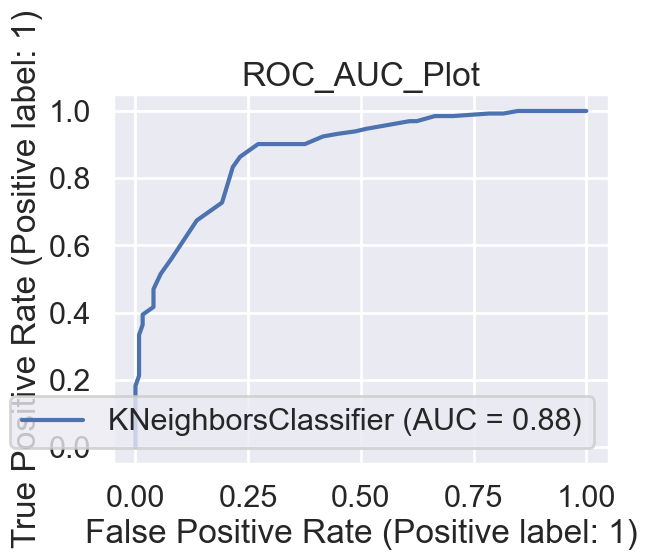

In [223]:
model(knn)

In [221]:
k_range = list(range(15, 30))
parameter = dict(n_neighbors=k_range)

In [222]:
classifier_knn=GridSearchCV(knn,param_grid=parameter, scoring='accuracy', return_train_score=True, verbose=2)

classifier_knn.fit(X_train,y_train)

print(classifier_knn.best_params_)

print(classifier_knn.best_score_)

ypred = classifier_knn.predict(X_test)

acc4=accuracy_score(y_test,ypred)
accuracies['KNN2']=acc4*100
print("Training accuracy score of the model is:",accuracy_score(y_train, classifier_knn.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred)*100,"%")


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=17; total time=   0.0s
[CV] END .....................................n_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=17; total time=   0.0s
[CV] END .....................................n_

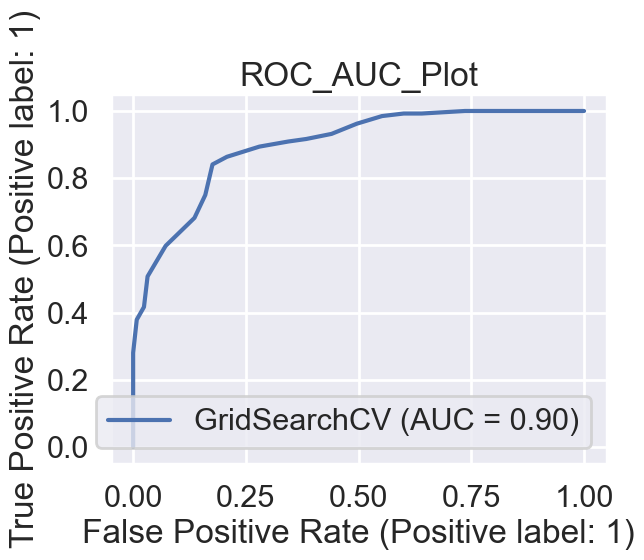

In [224]:
model(classifier_knn)

In [65]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred))

print("Classification Report",classification_report(y_test,ypred))

Confusion matrix of the model [[83 17]
 [12 93]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.83      0.85       100
           1       0.85      0.89      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



# SVM

In [226]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(xtrain, ytrain)

ypred2 = svc.predict(xtest)

acc5=accuracy_score(ytest,ypred2)
accuracies['SVM']=acc5*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, svc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred2)*100,"%")


Training accuracy score of the model is: 90.86294416243655 %
Testing accuracy score of the model is: 89.88326848249028 %


Cross Validation Score :  75.93%
ROC_AUC Score :  71.82%


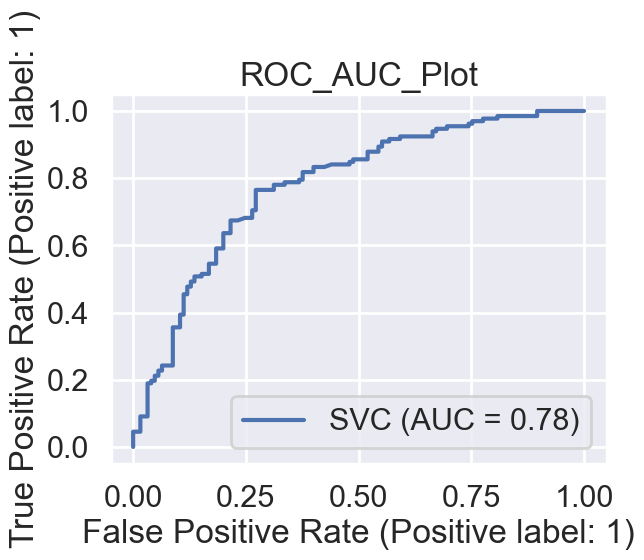

In [227]:
model(svc)

In [228]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred2))

print("Classification Report",classification_report(ytest,ypred2))

Confusion matrix of the model [[116   9]
 [ 17 115]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.93      0.90       125
           1       0.93      0.87      0.90       132

    accuracy                           0.90       257
   macro avg       0.90      0.90      0.90       257
weighted avg       0.90      0.90      0.90       257



In [229]:
parameter2 ={'C':[1,5],'gamma':[0.1, 0.01],'kernel': ['linear','rbf']}
classifier_svc=GridSearchCV(svc,param_grid=parameter2,scoring='accuracy',cv=2)
classifier_svc.fit(X_train,y_train)
print(classifier_svc.best_params_)

{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}


In [230]:
print(classifier_svc.best_score_)

0.9158536585365854


In [231]:
ypred = classifier_svc.predict(X_test)

In [232]:
acc6=accuracy_score(y_test,ypred)
accuracies['SVM2']=acc6*100
print("Training accuracy score of the model is:",accuracy_score(y_train, classifier_svc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred)*100,"%")

Training accuracy score of the model is: 99.14634146341463 %
Testing accuracy score of the model is: 98.04878048780488 %


Cross Validation Score :  94.92%
ROC_AUC Score :  93.33%


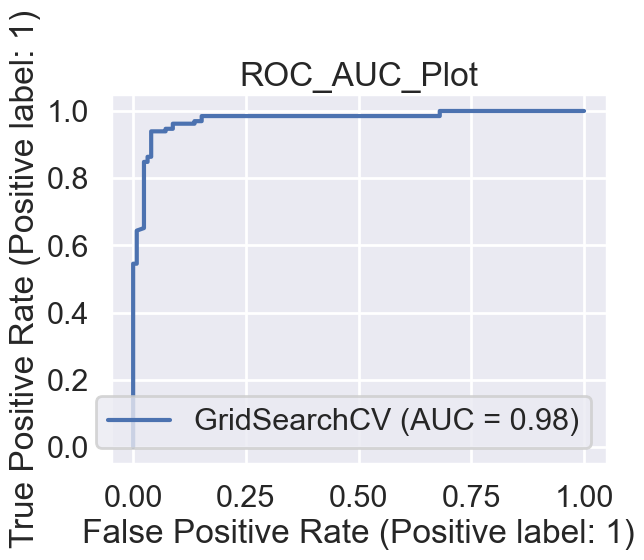

In [233]:
model(classifier_svc)

In [234]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred))
print("Classification Report",classification_report(y_test,ypred))

Confusion matrix of the model [[ 98   2]
 [  2 103]]
Classification Report               precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.98      0.98      0.98       105

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



# DECISION TREE

In [235]:
from sklearn.tree import DecisionTreeClassifier

In [236]:
dtc = DecisionTreeClassifier(random_state = 1000,max_depth = 10,min_samples_leaf = 10 )
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=1000)

In [237]:
ypred3 = dtc.predict(X_test)

In [238]:
acc7=accuracy_score(y_test,ypred3)
accuracies['DT']=acc7*100

In [239]:
print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred3)*100,"%")

Training accuracy score of the model is: 92.4390243902439 %
Testing accuracy score of the model is: 88.78048780487805 %


Cross Validation Score :  92.70%
ROC_AUC Score :  90.74%


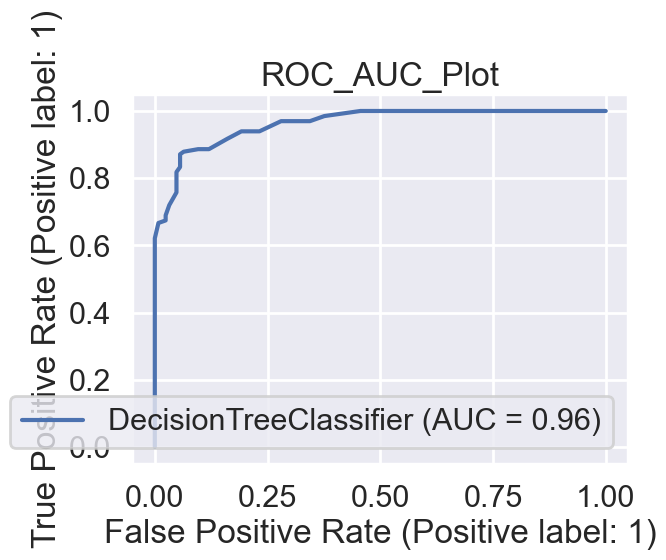

In [240]:
model(dtc)

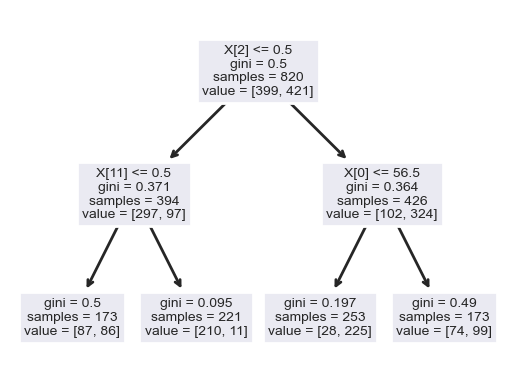

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

In [241]:
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(X_train,y_train)
from sklearn.tree import plot_tree
plot_tree(tree,fontsize=10)
plt.show()
plt.figure(figsize=(100,100))

In [242]:
parameter1 ={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[1,2,3,4,5],'max_features':['auto', 'sqrt', 'log2']}

In [243]:
classifier_decisiontree=GridSearchCV(dtc,param_grid=parameter1,scoring='accuracy',cv=10)

classifier_decisiontree.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=10,
                                              random_state=1000),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [244]:
ypred = classifier_decisiontree.predict(X_test)

Cross Validation Score :  87.63%
ROC_AUC Score :  86.42%


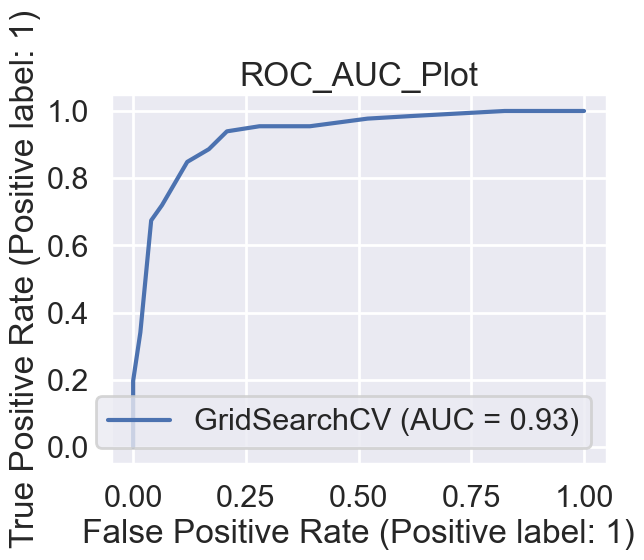

In [245]:
model(classifier_decisiontree)

In [82]:
acc8=accuracy_score(y_test,ypred)
accuracies['DT2']=acc8*100
print("Training accuracy score of the model is:",accuracy_score(y_train, classifier_decisiontree.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred)*100,"%")

Training accuracy score of the model is: 85.85365853658537 %
Testing accuracy score of the model is: 86.34146341463415 %


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=180)

In [52]:
ypred5 = rfc.predict(X_test)
acc9=accuracy_score(y_test,ypred5)
accuracies['RF']=acc9*100

In [53]:
print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred5)*100,"%")

Training accuracy score of the model is: 98.90243902439025 %
Testing accuracy score of the model is: 97.5609756097561 %


Cross Validation Score :  96.70%
ROC_AUC Score :  94.55%


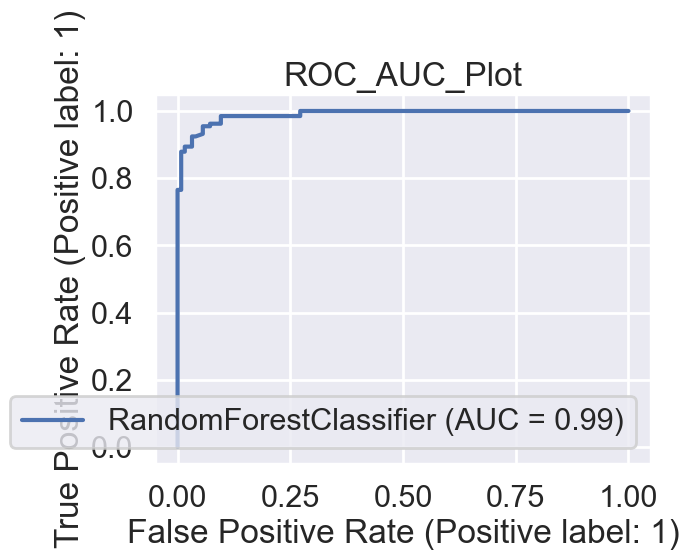

In [54]:
model(rfc)

In [62]:
import pickle
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)
# Load the model from the file
with open('heart_disease_model.pkl', 'rb') as file:
    best_model = pickle.load(file)

In [56]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [63]:
import pickle
import gradio as gr


# Define the prediction function
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    input_data = [[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]]
    prediction = best_model.predict(input_data)
    return f"Heart Disease Prediction: {'Positive' if prediction[0] == 1 else 'Negative'}"

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Number(label="Age"),
        #gr.Radio(choices=[1, 0], label="Sex (1: Male, 0: Female)"),
        gr.Dropdown(choices=[0, 1, 2, 3], label="Chest Pain Type (0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic)"),
        #gr.Number(label="Resting Blood Pressure (trestbps)"),
        #gr.Number(label="Serum Cholesterol (chol)"),
        #gr.Radio(choices=[1, 0], label="Fasting Blood Sugar > 120 mg/dl (1: True, 0: False)"),
        #gr.Radio(choices=[0, 1, 2], label="Resting ECG (0: Normal, 1: ST-T Wave Abnormality, 2: Left Ventricular Hypertrophy)"),
        #gr.Number(label="Maximum Heart Rate Achieved (thalach)"),
        gr.Radio(choices=[1, 0], label="Exercise Induced Angina (1: Yes, 0: No)"),
        #gr.Number(label="ST Depression Induced by Exercise (oldpeak)"),
        #gr.Radio(choices=[0, 1, 2], label="Slope of Peak Exercise ST Segment (0: Upsloping, 1: Flat, 2: Downsloping)"),
        gr.Number(label="Number of Major Vessels Colored by Fluoroscopy (ca)"),
        gr.Radio(choices=[0, 1, 2], label="Thalassemia (0: Normal, 1: Fixed Defect, 2: Reversible Defect)")
    ],
    outputs="text",
    title="Heart Disease Prediction",
    description="Enter your details to get a prediction on heart disease risk."
)

# Launch the interface
iface.launch()


Running on local URL:  http://127.0.0.1:7862
IMPORTANT: You are using gradio version 4.7.1, however version 4.29.0 is available, please upgrade.
--------

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\91989\anaconda3\lib\site-packages\gradio\queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
  File "C:\Users\91989\anaconda3\lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
  File "C:\Users\91989\anaconda3\lib\site-packages\gradio\blocks.py", line 1522, in process_api
    result = await self.call_function(
  File "C:\Users\91989\anaconda3\lib\site-packages\gradio\blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\Users\91989\anaconda3\lib\site-packages\anyio\to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "C:\Users\91989\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "C:\Users\91989\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", li

In [277]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred5))
print("Classification Report",classification_report(y_test,ypred5))

Confusion matrix of the model [[ 86  14]
 [  5 100]]
Classification Report               precision    recall  f1-score   support

           0       0.95      0.86      0.90       100
           1       0.88      0.95      0.91       105

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



In [278]:
n_estimators=[100]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_leaf=[1,2]
bootstrap=[True,False]
min_samples_split=[2,5]

In [279]:
param_grid={'max_features':max_features,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap,'min_samples_split':min_samples_split}

In [280]:
classifier_randomsearch=GridSearchCV(rfc,param_grid,scoring='accuracy',cv=10)
classifier_randomsearch.fit(X_train,y_train)
print(classifier_randomsearch.best_params_)
print(classifier_randomsearch.best_score_)

{'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
0.8939024390243901


In [281]:
ypred5 =classifier_randomsearch.predict(X_test)
acc10=accuracy_score(y_test,ypred5)
accuracies['RF2']=acc10*100

In [282]:
acc10=accuracy_score(y_test,ypred5)
accuracies['RF2']=acc10*100
print("Training accuracy score of the model is:",accuracy_score(y_train,classifier_randomsearch.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred5)*100,"%")

Training accuracy score of the model is: 90.97560975609757 %
Testing accuracy score of the model is: 89.75609756097562 %


In [283]:
model(classifier_randomsearch)

KeyboardInterrupt: 

In [93]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred5))
print("Classification Report",classification_report(y_test,ypred5))

Confusion matrix of the model [[ 85  15]
 [  4 101]]
Classification Report               precision    recall  f1-score   support

           0       0.96      0.85      0.90       100
           1       0.87      0.96      0.91       105

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



# Gradient Boosting

In [284]:
from sklearn.ensemble import GradientBoostingClassifier

In [285]:
gbc = GradientBoostingClassifier()

In [286]:
gbc = GradientBoostingClassifier(learning_rate = 0.5, loss = 'deviance', n_estimators = 18)

In [287]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=18)

In [288]:
ypred6 = gbc.predict(X_test)
acc11 = accuracy_score(y_test,ypred6)
accuracies['GB1']=acc11*100

In [289]:
print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred6)*100,"%")

Training accuracy score of the model is: 98.90243902439025 %
Testing accuracy score of the model is: 97.5609756097561 %


Cross Validation Score :  95.72%
ROC_AUC Score :  93.03%


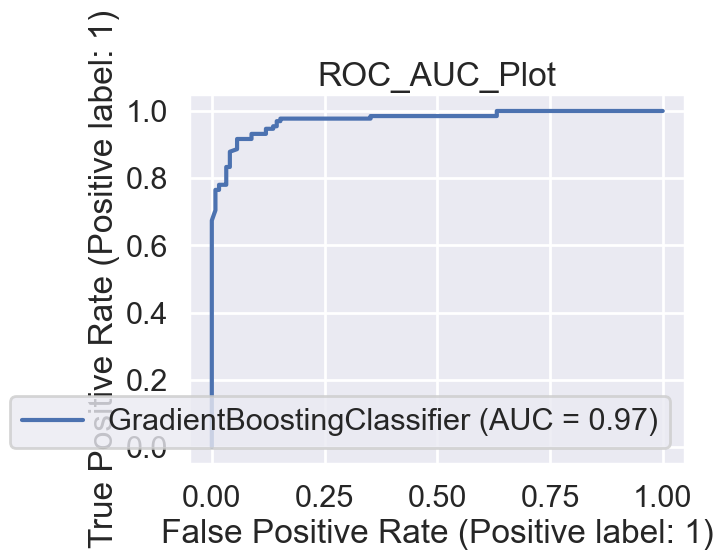

In [290]:
model(gbc)

In [291]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
parameters = {
    'learning_rate': [0.5],
    'subsample': [0.2, 0.3, 0.1],
    'n_estimators': [18,15],
    'max_depth': [ 1,2,3,4],
    'min_samples_split':[50,55,45,40]
}

In [292]:
classifier_Gb=GridSearchCV(gbc,param_grid=parameters,scoring='accuracy',cv=6)

In [293]:
classifier_Gb.fit(X_train,y_train)

GridSearchCV(cv=6,
             estimator=GradientBoostingClassifier(learning_rate=0.5,
                                                  n_estimators=18),
             param_grid={'learning_rate': [0.5], 'max_depth': [1, 2, 3, 4],
                         'min_samples_split': [50, 55, 45, 40],
                         'n_estimators': [18, 15],
                         'subsample': [0.2, 0.3, 0.1]},
             scoring='accuracy')

In [294]:
print(classifier_Gb.best_score_)
print(classifier_Gb.best_params_)

0.9292525404322314
{'learning_rate': 0.5, 'max_depth': 4, 'min_samples_split': 50, 'n_estimators': 15, 'subsample': 0.3}


In [295]:
ypred6 = classifier_Gb.predict(X_test)

In [296]:
acc12 = accuracy_score(y_test,ypred6)
accuracies['GB2']=acc12*100

In [297]:
model(classifier_Gb)

KeyboardInterrupt: 

In [157]:
print("Training accuracy score of the model is:",accuracy_score(y_train,classifier_Gb.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred6)*100,"%")

Training accuracy score of the model is: 96.58536585365853 %
Testing accuracy score of the model is: 96.09756097560975 %


# Naive Bayes


In [298]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)
ypred7 = classifier_NB.predict(X_test)
acc13 = accuracy_score(y_test,ypred7)
accuracies['NB']=acc11*100

In [299]:
print("Training accuracy score of the model is:",accuracy_score(y_train, classifier_NB.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred7)*100,"%")

Training accuracy score of the model is: 82.92682926829268 %
Testing accuracy score of the model is: 82.92682926829268 %


Cross Validation Score :  86.66%
ROC_AUC Score :  81.62%


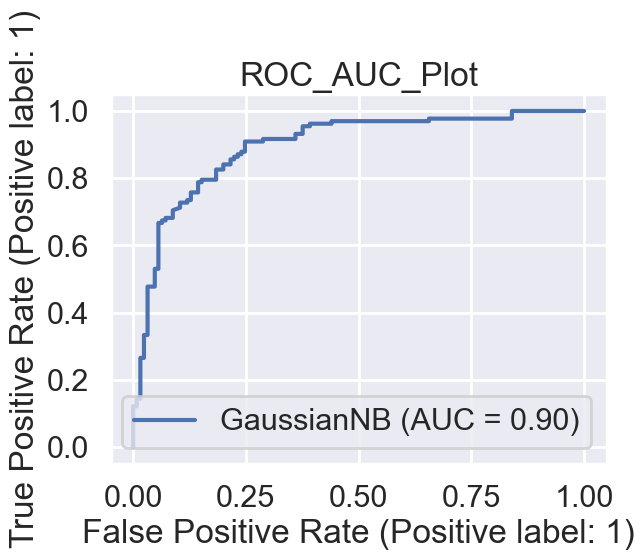

In [300]:
model(classifier_NB)

In [172]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred7))
print("Classification Report",classification_report(y_test,ypred7))

Confusion matrix of the model [[78 22]
 [13 92]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.78      0.82       100
           1       0.81      0.88      0.84       105

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



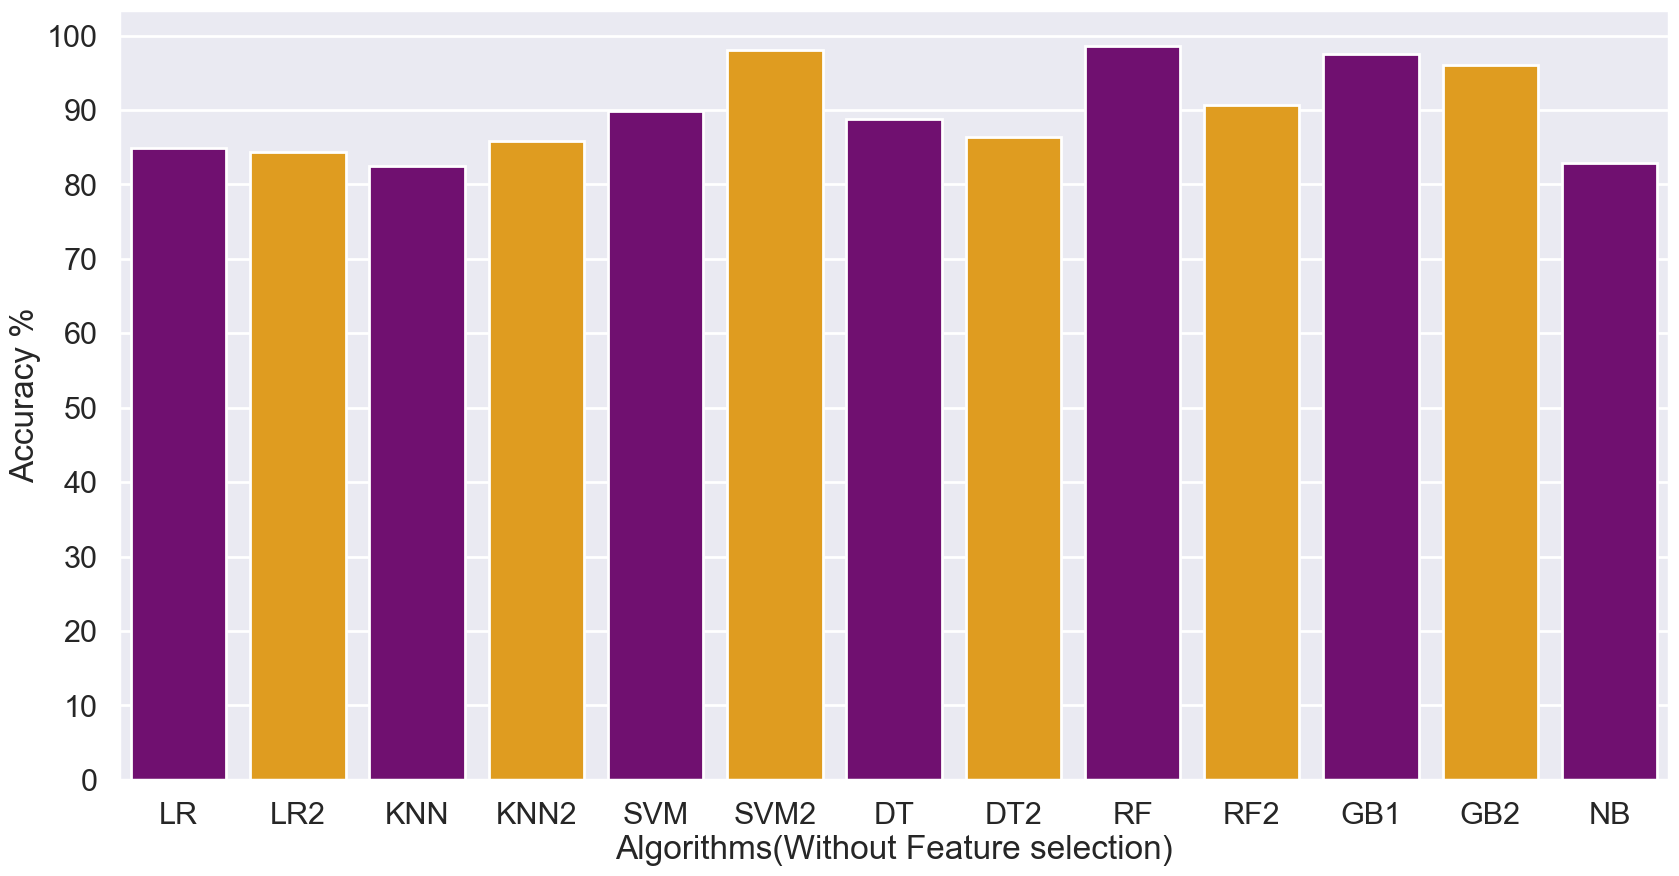

In [173]:
colors = ["purple", "orange"]
# sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms(Without Feature selection)")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

# Model creation after Forward Feature Selection

In [301]:
data=dataset[['age', 'cp', 'chol', 'restecg', 'thalach', 'ca', 'thal','target']].copy()
data_set=dataset[['cp','thal','oldpeak','exang','thalach','slope','ca','chol','target']].copy()

In [302]:
from sklearn.model_selection import train_test_split, GridSearchCV
xxx = data_set.drop('target', axis = 1)
YYY = data_set['target']
XXXtrain, XXXtest, YYYtrain, YYYtest = train_test_split(xxx, YYY, test_size = 0.25, stratify = YYY, random_state = 0)

In [303]:
xx = data.drop('target', axis = 1)
YY = data['target']
XXtrain, XXtest, YYtrain, YYtest = train_test_split(xx, YY, test_size = 0.25, stratify = YY, random_state = 0)

In [304]:
def model(classifier):
    
    classifier.fit(XXtrain,YYtrain)
    prediction = classifier.predict(XXtest)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(YYtest,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,XXtrain,YYtrain,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(YYtest,prediction)))
    plot_roc_curve(classifier, XXtest,YYtest)
    plt.title('ROC_AUC_Plot')
    plt.show()

    
def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(YYtest,classifier.predict(XXtest))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap ='BrBG' ,fmt ='')
    
    # Classification Report
    print(classification_report(YYtest,classifier.predict(XXtest)))

# 1. Logistic Regression

In [305]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(XXtrain,YYtrain)

ypred = lr.predict(XXtest)

acc=accuracy_score(YYtest,ypred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain, lr.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred)*100,"%")

Training accuracy score of the model is: 82.29166666666666 %
Testing accuracy score of the model is: 83.65758754863813 %


Accuracy :  83.66%
Cross Validation Score :  85.67%
ROC_AUC Score :  83.58%


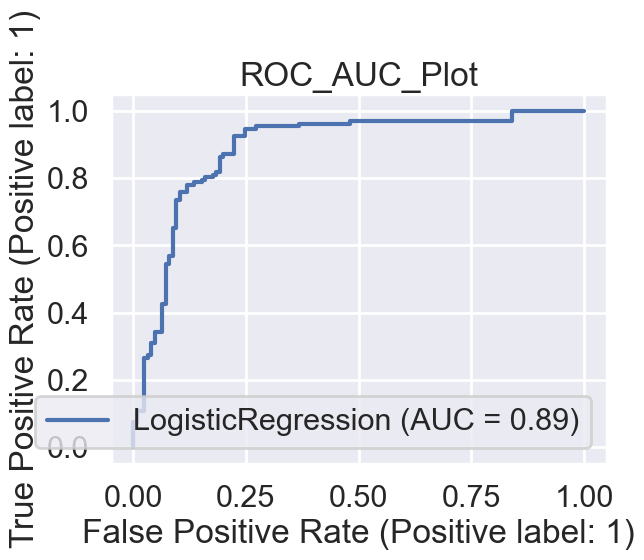

In [306]:
model(lr)

In [307]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred))
print("Classification Report",classification_report(YYtest,ypred))

Confusion matrix of the model [[101  24]
 [ 18 114]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.81      0.83       125
           1       0.83      0.86      0.84       132

    accuracy                           0.84       257
   macro avg       0.84      0.84      0.84       257
weighted avg       0.84      0.84      0.84       257



In [308]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300],'solver':['newton-cg','lbfgs','liblinear']}

In [309]:
classifier_regressor=GridSearchCV(lr,param_grid=parameter,scoring='accuracy')

In [310]:
classifier_regressor.fit(XXtrain,YYtrain)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [311]:
print(classifier_regressor.best_params_)

{'C': 4, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}


In [312]:
print(classifier_regressor.best_score_)

0.816484169425346


In [313]:
ypred = classifier_regressor.predict(XXtest)
acc2=accuracy_score(YYtest,ypred)
accuracies['LR2']=acc2*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain, classifier_regressor.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred)*100,"%")

Training accuracy score of the model is: 81.38020833333334 %
Testing accuracy score of the model is: 81.71206225680933 %


In [314]:
model(classifier_regressor)

Accuracy :  81.71%


KeyboardInterrupt: 

In [ ]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred))
print("Classification Report",classification_report(YYtest,ypred))

# 2. KNearestNeighbors

In [315]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30)

knn.fit(XXtrain,YYtrain)

ypred1 = knn.predict(XXtest)

acc3=accuracy_score(YYtest,ypred1)
accuracies['KNN']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(YYtrain, knn.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred1)*100,"%")

Training accuracy score of the model is: 77.86458333333334 %
Testing accuracy score of the model is: 79.76653696498055 %


Accuracy :  79.77%
Cross Validation Score :  83.64%
ROC_AUC Score :  79.60%


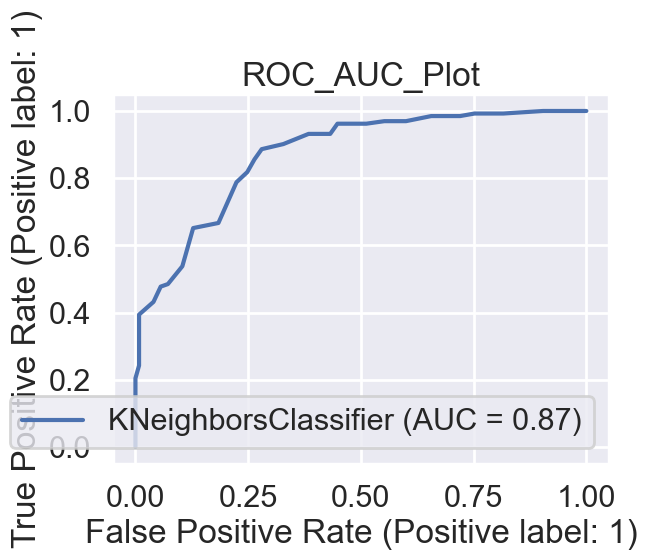

In [316]:
model(knn)

In [ ]:
k_range = list(range(15, 30))
parameter = dict(n_neighbors=k_range)

In [ ]:
classifier_knn=GridSearchCV(knn,param_grid=parameter, scoring='accuracy', return_train_score=True, verbose=2)

classifier_knn.fit(XXtrain,YYtrain)

print(classifier_knn.best_params_)

print(classifier_knn.best_score_)

ypred = classifier_knn.predict(XXtest)

acc4=accuracy_score(YYtest,ypred)
accuracies['KNN2']=acc4*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain, classifier_knn.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred)*100,"%")

In [ ]:
model(classifier_knn)

In [ ]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred))
print("Classification Report",classification_report(YYtest,ypred))

# 3. SVM

In [317]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(XXtrain, YYtrain)

ypred2 = svc.predict(XXtest)

acc5=accuracy_score(YYtest,ypred2)
accuracies['SVM']=acc5*100

In [318]:
print("Training accuracy score of the model is:",accuracy_score(YYtrain, svc.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred2)*100,"%")

Training accuracy score of the model is: 67.70833333333334 %
Testing accuracy score of the model is: 68.09338521400778 %


Accuracy :  68.09%
Cross Validation Score :  74.85%
ROC_AUC Score :  68.37%


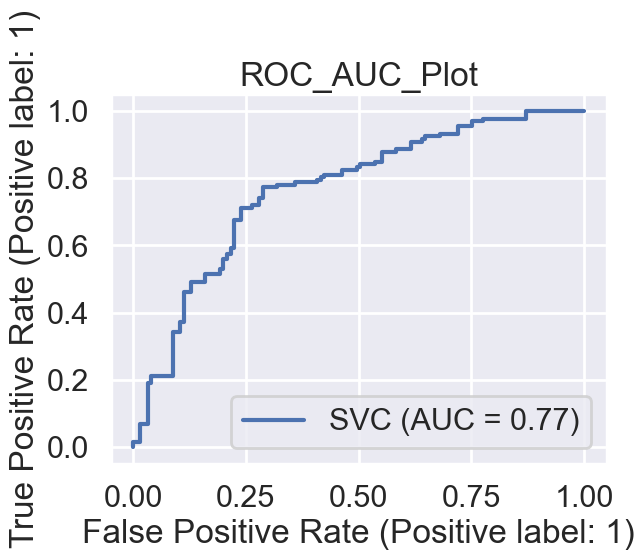

In [319]:
model(svc)

In [ ]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred2))
print("Classification Report",classification_report(YYtest,ypred2))


In [ ]:
parameter2 ={'C':[1, 10, 100],'gamma':[0.001, 0.0001],'kernel': ['linear','rbf']}
classifier_svc=GridSearchCV(svc,param_grid=parameter2,scoring='accuracy',cv=3)

In [ ]:
classifier_svc.fit(XXtrain,YYtrain)

print(classifier_svc.best_params_)
print(classifier_svc.best_score_)

ypred = classifier_svc.predict(XXtest)

In [ ]:
acc6=accuracy_score(YYtest,ypred)
accuracies['SVM2']=acc6*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain, classifier_svc.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred)*100,"%")

In [ ]:
model(classifier_svc)

In [ ]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred1))
print("Classification Report",classification_report(YYtest,ypred1))

# 4. DECISION TREE

In [320]:
from sklearn.tree import DecisionTreeClassifier

In [321]:
dtc = DecisionTreeClassifier(random_state = 1000,max_depth = 10,min_samples_leaf = 10 )
dtc.fit(XXtrain, YYtrain)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=1000)

In [322]:
ypred3 = dtc.predict(XXtest)

In [323]:
acc7=accuracy_score(YYtest,ypred3)
accuracies['DT']=acc7*100

In [324]:
print("Training accuracy score of the model is:",accuracy_score(YYtrain, dtc.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred3)*100,"%")

Training accuracy score of the model is: 87.890625 %
Testing accuracy score of the model is: 84.8249027237354 %


Accuracy :  84.82%
Cross Validation Score :  93.79%
ROC_AUC Score :  84.87%


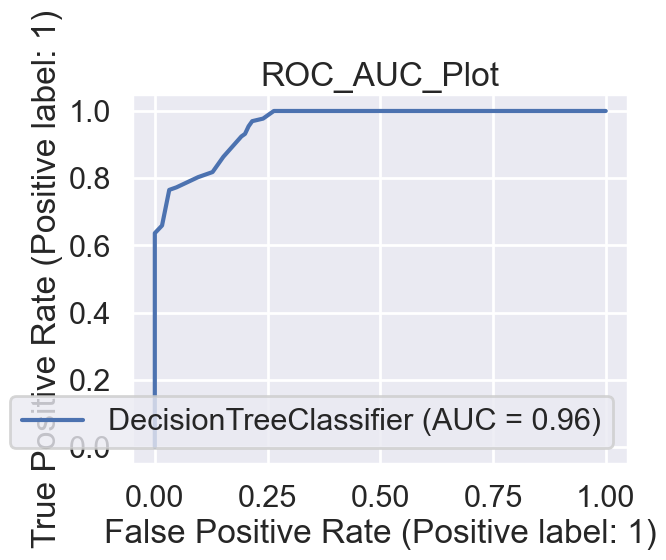

In [325]:
model(dtc)

In [326]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred3))
print("Classification Report",classification_report(YYtest,ypred3))

Confusion matrix of the model [[108  17]
 [ 22 110]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.85       125
           1       0.87      0.83      0.85       132

    accuracy                           0.85       257
   macro avg       0.85      0.85      0.85       257
weighted avg       0.85      0.85      0.85       257



In [ ]:
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(XXtrain,YYtrain)
from sklearn.tree import plot_tree
plot_tree(tree,fontsize=10)
plt.show()
plt.figure(figsize=(100,100))

In [ ]:
parameter1 ={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[1,2,3,4,5],'max_features':['auto', 'sqrt', 'log2']}

In [ ]:
classifier_decisiontree=GridSearchCV(dtc,param_grid=parameter1,scoring='accuracy',cv=10)

In [ ]:
classifier_decisiontree.fit(XXtrain,YYtrain)

In [ ]:
ypred = classifier_decisiontree.predict(XXtest)

acc8=accuracy_score(YYtest,ypred)
accuracies['DT2']=acc8*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain, classifier_decisiontree.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred)*100,"%")

In [ ]:
model(classifier_decisiontree)

In [327]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(XXtrain, YYtrain)

ypred5 = rfc.predict(XXtest)

acc9=accuracy_score(YYtest,ypred5)
accuracies['RF']=acc9*100

print("Training accuracy score of the model is:",accuracy_score(YYtrain, rfc.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred5)*100,"%")

print("Confusion matrix of the model",confusion_matrix(YYtest,ypred5))

print("Classification Report",classification_report(YYtest,ypred5))


Training accuracy score of the model is: 98.17708333333334 %
Testing accuracy score of the model is: 96.88715953307393 %
Confusion matrix of the model [[119   6]
 [  2 130]]
Classification Report               precision    recall  f1-score   support

           0       0.98      0.95      0.97       125
           1       0.96      0.98      0.97       132

    accuracy                           0.97       257
   macro avg       0.97      0.97      0.97       257
weighted avg       0.97      0.97      0.97       257



Accuracy :  96.89%
Cross Validation Score :  98.60%
ROC_AUC Score :  96.84%


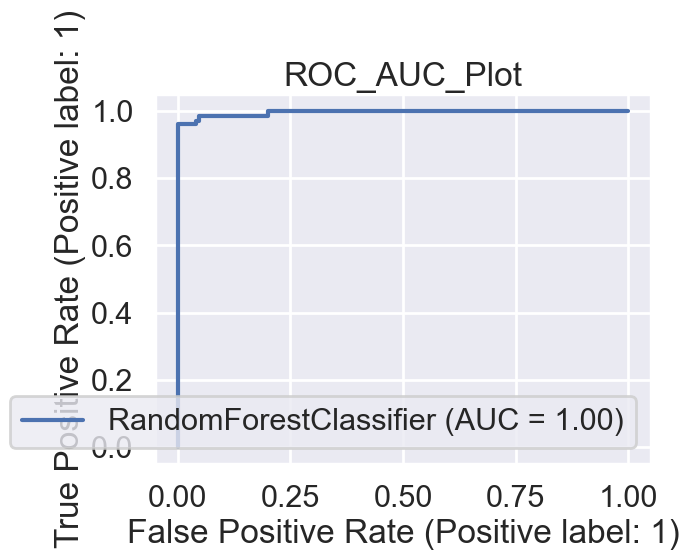

In [328]:
model(rfc)

In [ ]:
n_estimators=[100]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_leaf=[1,2]
bootstrap=[True,False]
min_samples_split=[2,5]

In [ ]:
param_grid={'max_features':max_features,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap,'min_samples_split':min_samples_split}

In [ ]:
classifier_randomsearch=GridSearchCV(rfc,param_grid,scoring='accuracy',cv=3)

In [ ]:
classifier_randomsearch.fit(XXtrain,YYtrain)
print(classifier_randomsearch.best_params_)
print(classifier_randomsearch.best_score_)
ypred5 =classifier_randomsearch.predict(XXtest)
acc10=accuracy_score(YYtest,ypred5)
accuracies['RF2']=acc10*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain,classifier_randomsearch.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred5)*100,"%")

In [ ]:
model(classifier_randomsearch)

In [ ]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred5))
print("Classification Report",classification_report(YYtest,ypred5))

# 6. Gradient Boosting

In [329]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)
gbc.fit(XXtrain, YYtrain)

ypred6 = gbc.predict(XXtest)

acc11 = accuracy_score(YYtest,ypred6)
accuracies['GB1']=acc11*100

In [330]:
print("Training accuracy score of the model is:",accuracy_score(YYtrain, gbc.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred6)*100,"%")

Training accuracy score of the model is: 96.35416666666666 %
Testing accuracy score of the model is: 93.77431906614785 %


Accuracy :  93.77%
Cross Validation Score :  97.78%
ROC_AUC Score :  93.77%


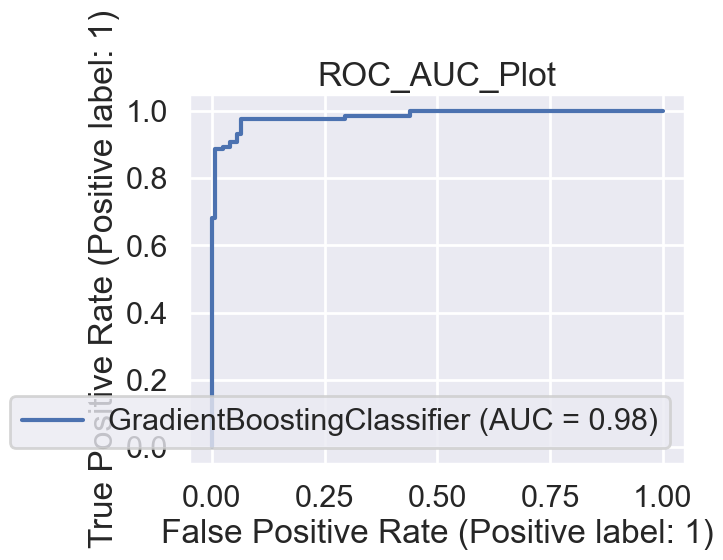

In [331]:
model(gbc)

In [ ]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
}

In [ ]:
classifier_Gb=GridSearchCV(gbc,param_grid=parameters,scoring='accuracy',cv=3)
classifier_Gb.fit(XXtrain,YYtrain)
print(classifier_Gb.best_score_)
print(classifier_Gb.best_params_)

In [ ]:
model(classifier_Gb)

In [ ]:
ypred6 = classifier_Gb.predict(XXtest)
acc12 = accuracy_score(YYtest,ypred6)
accuracies['GB2']=acc12*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain,classifier_Gb.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred6)*100,"%")

# 7. Naive Bayes

In [332]:
from sklearn.naive_bayes import GaussianNB

classifier_NB = GaussianNB()
classifier_NB.fit(XXtrain, YYtrain)

ypred7 = classifier_NB.predict(XXtest)

acc11 = accuracy_score(YYtest,ypred7)
accuracies['NB']=acc11*100

print("Training accuracy score of the model is:",accuracy_score(YYtrain, classifier_NB.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred7)*100,"%")

Training accuracy score of the model is: 77.47395833333334 %
Testing accuracy score of the model is: 81.71206225680933 %


Accuracy :  81.71%
Cross Validation Score :  87.00%
ROC_AUC Score :  81.65%


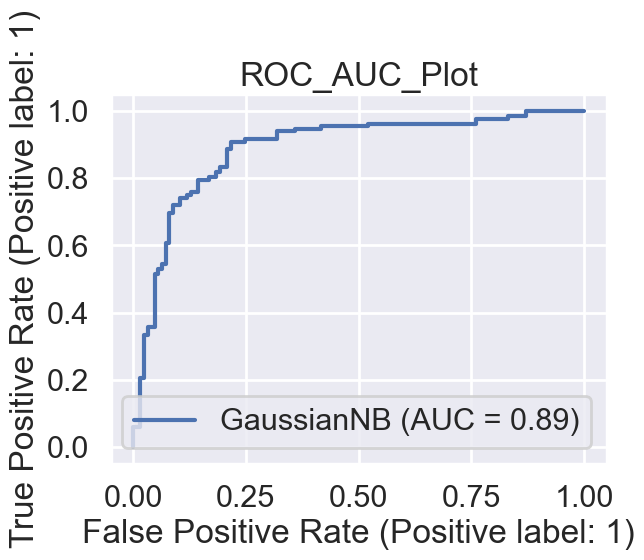

In [333]:
model(classifier_NB)

In [184]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred7))
print("Classification Report",classification_report(ytest,ypred7))

Confusion matrix of the model [[ 99  26]
 [ 21 111]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.79      0.81       125
           1       0.81      0.84      0.83       132

    accuracy                           0.82       257
   macro avg       0.82      0.82      0.82       257
weighted avg       0.82      0.82      0.82       257



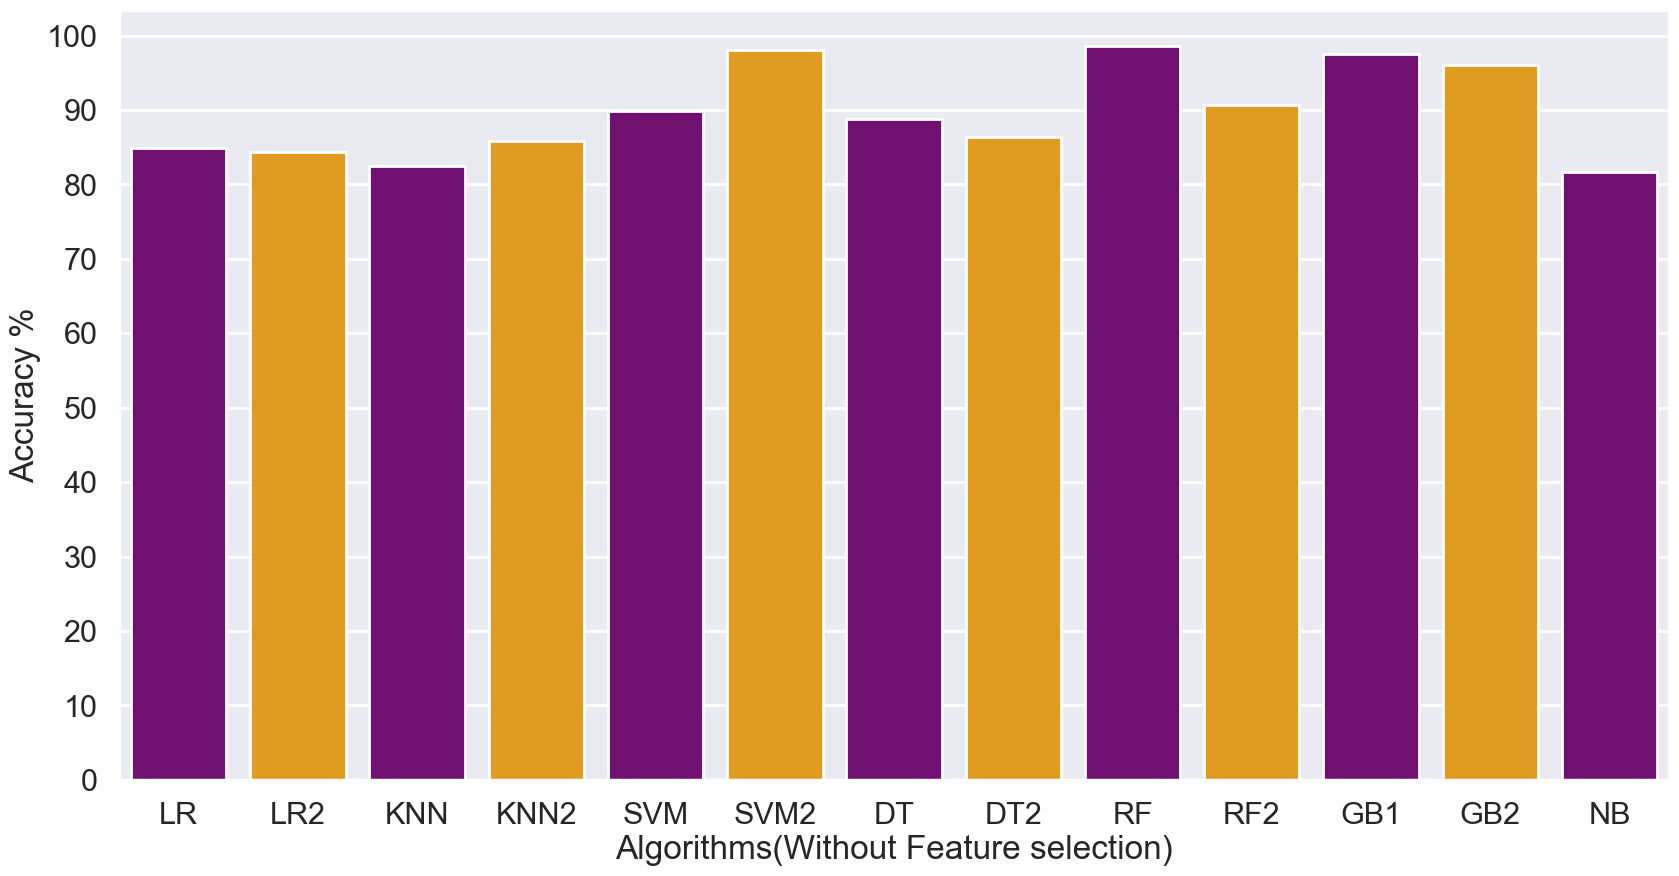

In [185]:
colors = ["purple", "orange"]

# sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms(Without Feature selection)")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()